# Project: Stop and Frisk 2018 - 2020 
### Team: Olivia Hao, Lohith Chiluka and Camila Garcia
### 95-791  Data Mining (A2)
### Data Cleaning and Question Definition


## **OVERVIEW OF THE PROJECT**

The New York City stop-and-frisk program is a practice of the New York City Police Department in which a police officer who suspects a person has committed, is committing, or is about to commit a felony or a penal law misdemeanor, stops and questions that person, and, if the officer suspects he or she is in danger of physical injury, frisks the person stopped for weapons. 

Over the years, the program has caused controversies related to racial profiling. Claims have been made that African-American and Hispanic individuals were stopped more frequently than whites, while the program failed to reduce robbery, burglary, or other crimes. 


The purpose of this project will be to use different models to classify three of our variables in order to predict accurately potential outcomes of stop and frisk for each variable in an unseen dataset. As such we will attempt to answer the following questions:

1.  Considering the number of individuals stopped in the past 3 years, if an individual were to be stopped, can we predict in which of the following classes they would fall into:
a. 0-30 minutes
b. 30-60 minutes
c. 60+ minutes  

2. Accounting for the various factors that could be involved in the reasoning behind an individual being stopped and frisked, how accurately can we predict that an individual who is stopped would fall into the ‘Frisked’ class or the ‘Not-Frisked class?

3. Can we predict that an individual who has been stopped is also searched and what are the features that are most significant to an individual being stopped and searched?


The stop duration minutes corresponds to the time in minutes that an individual was stoped during their interaction with the police. 

The frisked flag (Y or N) indicates whether the police office who stopped the individual passed their hands over htem in search for hidden weaponds, drugs or any other item.  

The searched flag (Y or N) indicates whether the officer performed a thorough search or examination of rhe individuals vehicle or residence for evidence of the illegal weaponds, controlled susbtances. 

In both instances of frisked and search, the officer is authorized to seize any illegal item they find. 

**Additional notes regarding methodolody: 

Before trying to peform classification, the project explored other options to determine the type of model that will be best fit to predict stop duration minutes and frisked flag. In this process, all of the models explored (linear regression, ridge and lasso) returned high values of MSE and lower R^2 scores even after adjusting for PCA indicating these were not a very good fit for our data. The classification model appears to provide the most insight from the data in the context of the 3 questions to be answered. In this project we focused on using classification model as it provided the most analytical value.

In [1]:
#importing the libraries that would be used throughout the project

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
import time
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline
plt.style.use('seaborn-white')


# IMPORTING AND CLEANING THE DATA

In this step, the team performed a review of the data and addressed some of the inconsistencies found. When importing the raw data consolidated into an excel file for years 2018 and 2020, a warning pops up below indicating that there are inconsistencies in the data types of some columns. This is because in some of the flags of this data set there were parenthesis "(" instead of Yes (Y) and No (N). The team addressed this issue below by replacing these parenthesis with null values based on the assumption that we do not have data available for those datapoints. 

Additionally, most of the values in the data are categorial. As such, the majority of the columns were also transformed into numerical data for analysis purposes. 

In [2]:
#importing the data
stopnfrisk = pd.read_csv('CombinedData18-20_CLEAN.csv')
# NOTE - the warining sign comes from inaccuracies in the data. 
# Per the project instructions we corrected these imbalances in the following data cleaning section instead of excel

C:\Users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Data Cleaning
export_data = stopnfrisk.copy() #creating a copy to be

#correcting data entry errors
export_data['PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG'].replace('(', None, inplace = True )
export_data['SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG'].replace('(', None, inplace = True )
export_data['ASK_FOR_CONSENT_FLG'].replace('(', None, inplace = True )
export_data['CONSENT_GIVEN_FLG'].replace('(', None, inplace = True )
export_data = export_data.replace([' '], None)


list1 = export_data.columns #checking the number of variables
len(list1)

full_data = export_data.copy() 

full_data_numeric = full_data.applymap(np.isreal).head() #converting categorical data into numeric data
full_data_numeric
print(full_data_numeric)

full_objects = []
for i in range(0, len(full_data_numeric.columns)):
    if full_data_numeric.loc[0][i] == False:
        print(full_data_numeric.columns.values[i])
        full_objects.append(full_data_numeric.columns.values[i])
# print(full_objects)

from sklearn import preprocessing
full_col_encoded = []
for x in full_objects:
    full_label = preprocessing.LabelEncoder()
    full_data[x] = full_label.fit_transform(full_data[x])
    full_col_encoded.append(full_data[x])

print(full_data) 


   STOP_ID  STOP_FRISK_DATE  STOP_FRISK_TIME  YEAR  MONTH    DAY  \
0     True            False            False  True  False  False   
1     True            False            False  True  False  False   
2     True            False            False  True  False  False   
3     True            False            False  True  False  False   
4     True            False            False  True  False  False   

   STOP_WAS_INITIATED  RECORD_STATUS_CODE  ISSUING_OFFICER_RANK  \
0               False               False                 False   
1               False               False                 False   
2               False               False                 False   
3               False               False                 False   
4               False               False                 False   

   ISSUING_OFFICER_COMMAND_CODE  ...  STOP_LOCATION_PRECINCT  \
0                          True  ...                    True   
1                          True  ...                    True

In [5]:
#creating copy of full data before dropping columns - NEEDED BELOW
clean_full_data = full_data.copy()

print(clean_full_data)
clean_full_data.to_csv("clean_full_data.csv")


       STOP_ID  STOP_FRISK_DATE  STOP_FRISK_TIME  YEAR  MONTH  DAY  \
0            1                2              672  2020      4    6   
1            2                2              671  2020      4    6   
2            3                2              671  2020      4    6   
3            4                2               78  2020      4    6   
4            5                2             1362  2020      4    6   
...        ...              ...              ...   ...    ...  ...   
34006    11004              348              223  2018      2    1   
34007    11005              348              920  2018      2    1   
34008    11006              348              920  2018      2    1   
34009    11007              348              920  2018      2    1   
34010    11008              348              883  2018      2    1   

       STOP_WAS_INITIATED  RECORD_STATUS_CODE  ISSUING_OFFICER_RANK  \
0                       1                   0                    12   
1                

In [6]:
#Checking for null value 

clean_full_data.dropna(inplace= True)
print(clean_full_data.isnull().sum())

STOP_ID                           0
STOP_FRISK_DATE                   0
STOP_FRISK_TIME                   0
YEAR                              0
MONTH                             0
                                 ..
STOP_LOCATION_X                   0
STOP_LOCATION_Y                   0
STOP_LOCATION_ZIP_CODE            0
STOP_LOCATION_PATROL_BORO_NAME    0
STOP_LOCATION_BORO_NAME           0
Length: 83, dtype: int64


# **EXPLORATORY DATA ANALYSIS**

In this step, we performed some exploratory data analysis to better understand the data and identify some potential trends in our variables. 

<AxesSubplot:xlabel='YEAR', ylabel='STOP_DURATION_MINUTES'>

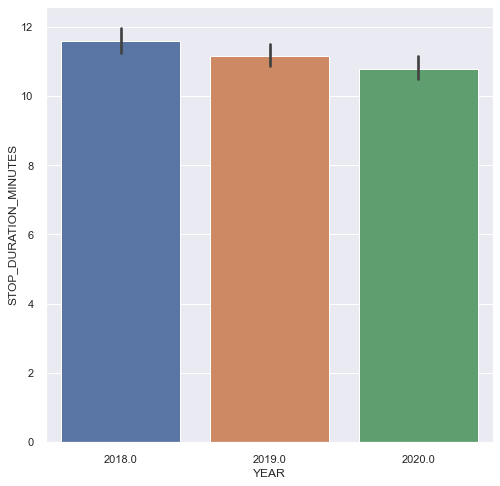

In [6]:
#Average stop duration by year
sns.set(rc={"figure.figsize":(8, 8)})
sns.barplot(x = 'YEAR',
            y = 'STOP_DURATION_MINUTES',
            data = export_data)

The average stop duration has seen a decling trend in the recent years. The average stop time for the three years seems to be around 11 minutesm with a decrease of less than a minute in 2 years. 

(array([28904.,  4066.,   675.,   176.,    51.]),
 array([  0,  20,  40,  60,  80, 100]),
 <BarContainer object of 5 artists>)

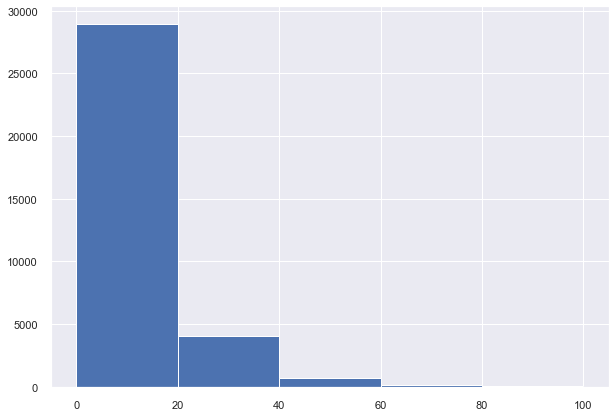

In [7]:
#histogram - stop duration 
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(export_data['STOP_DURATION_MINUTES'], bins = [0, 20, 40, 60, 80,100])

The data on stop duration is extremely imbalanced - with the majority of data in the 0 to 20 minute range. This will be an important consideration to make when performing classification for this particular variable. 

AxesSubplot(0.125,0.125;0.775x0.755)


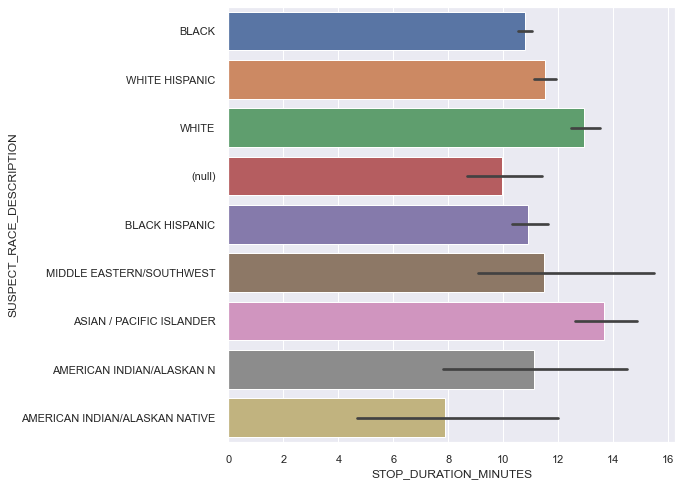

In [8]:
#barplot - stop duration by race
sns.set(rc={"figure.figsize":(8, 8)})
barplot_race= sns.barplot(data = export_data, x = 'STOP_DURATION_MINUTES', y= 'SUSPECT_RACE_DESCRIPTION')
print(barplot_race)

By assessing the average stop duration broken down by race, we see that asian / pacific islanders are stopped for the longest duration, followed by white and white hispanic. The lowest stop duration seems to be among Native Americans. However, we must acknowledge that there is a large chunk of unlabeled record and this breakdown may not be 100% aligned with reality.

AxesSubplot(0.125,0.125;0.775x0.755)


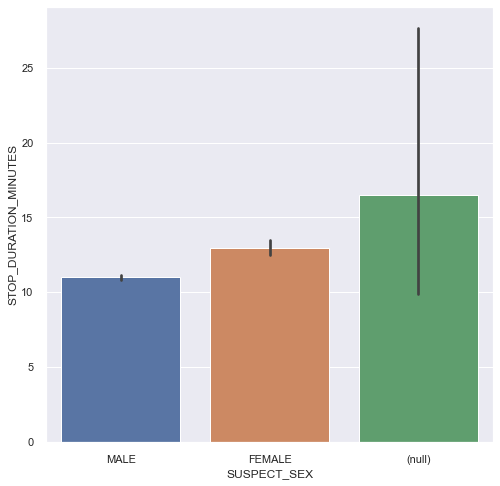

In [9]:
#barplot - stop duration by sex
sns.set(rc={"figure.figsize":(8, 8)})
barplot_sex= sns.barplot(data = export_data, y = 'STOP_DURATION_MINUTES', x= 'SUSPECT_SEX')
print(barplot_sex)

According to the graph, female are stopped for longer on average compared to men. Again, this observation could be skewed due to the large amount of unlabeled data.

AxesSubplot(0.125,0.125;0.775x0.755)


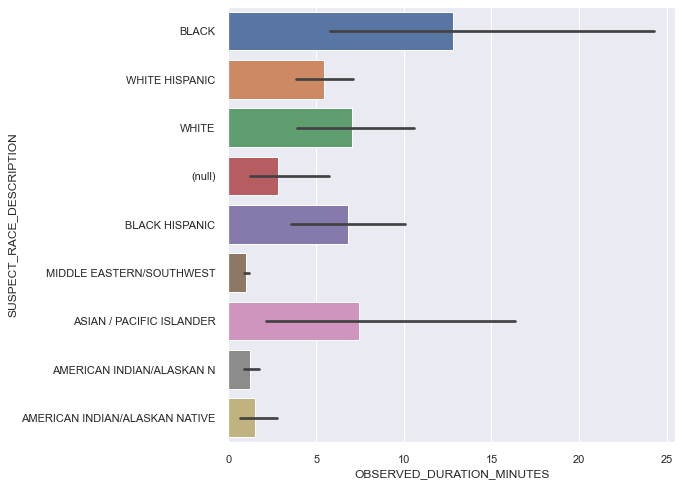

In [32]:
#barplot - observed duration by race
sns.set(rc={"figure.figsize":(8, 8)})
barplot_ob_race = sns.barplot(data = export_data, x = 'OBSERVED_DURATION_MINUTES', y= 'SUSPECT_RACE_DESCRIPTION')
print(barplot_ob_race)

It appears that police officers typically spend the most time observing black people, followed by asian/pacific islanders and whites before stop and frisk. Black individuals seems to have been observed for twice as much as awhite individual was observed. 

AxesSubplot(0.125,0.125;0.775x0.755)


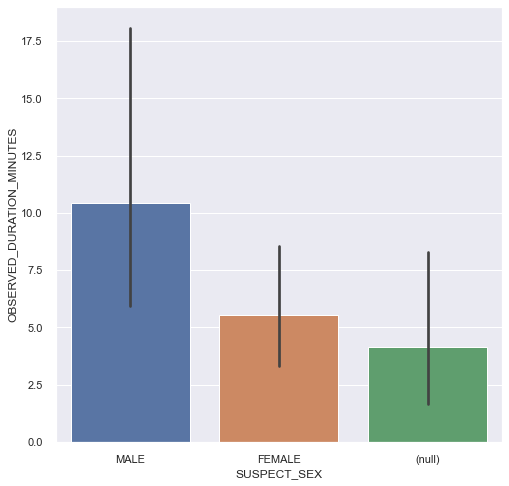

In [11]:
#barplot - observed duration by sex
sns.set(rc={"figure.figsize":(8, 8)})
barplot_ob_sex = sns.barplot(data = export_data, y = 'OBSERVED_DURATION_MINUTES', x= 'SUSPECT_SEX')
print(barplot_ob_sex)

Men are observed for longer than women before stop and frisk.

<AxesSubplot:>

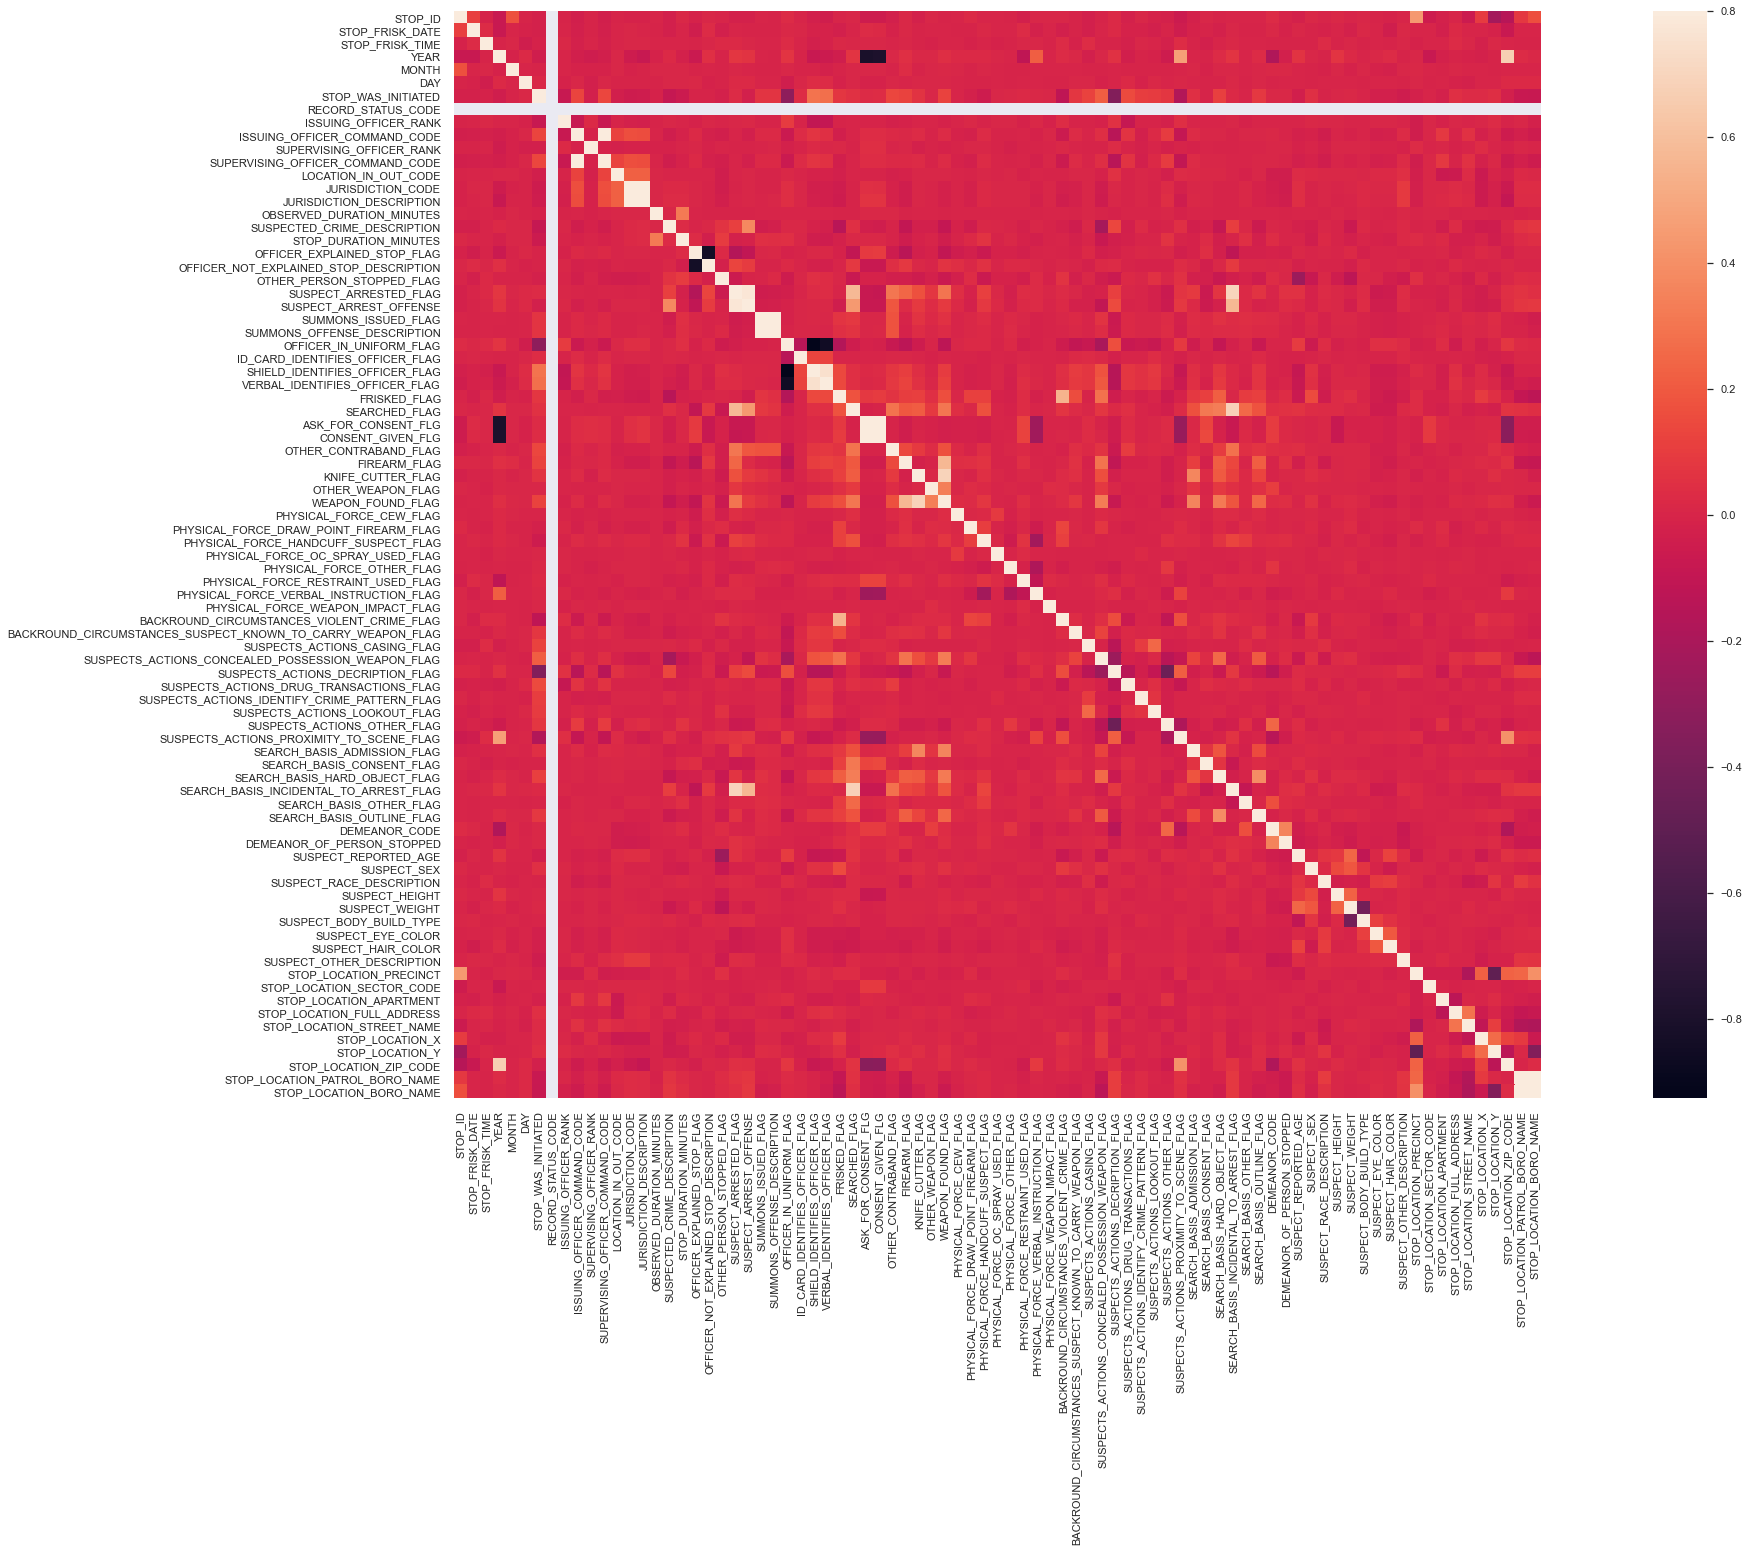

In [12]:
#correlation matrix
corrmat =clean_full_data.corr()
f, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(corrmat, vmax=0.8, square=True)


A preliminary assessment of the correlation matrix indicates that with the exception of a few variables, most of the variables are not heavily correlated with each other. As such, we will consider all of our variables for classification in our models below. 

# **QUESTION 1 - STOP DURATION MINUTES - CLASSIFICATION**

Summary of models used:
- KNN without oversampling
- KNN with oversampling
- Naive Bayes without oversampling
- Naive Bayes with oversampling
- Logistic Regression without oversampling
- Logistic Regression with oversampling

In [13]:
#Running simple regression to understand the statistical impact of each variable on stop duration
import statsmodels.api as sm
import statsmodels.formula.api as smf

lm_reg = smf.ols('STOP_DURATION_MINUTES ~ STOP_ID+STOP_FRISK_DATE+STOP_FRISK_TIME+YEAR+MONTH+DAY+STOP_WAS_INITIATED+RECORD_STATUS_CODE+ISSUING_OFFICER_RANK+ISSUING_OFFICER_COMMAND_CODE+SUPERVISING_OFFICER_RANK+SUPERVISING_OFFICER_COMMAND_CODE+LOCATION_IN_OUT_CODE+JURISDICTION_CODE+JURISDICTION_DESCRIPTION+OBSERVED_DURATION_MINUTES+SUSPECTED_CRIME_DESCRIPTION+OFFICER_EXPLAINED_STOP_FLAG+OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION+OTHER_PERSON_STOPPED_FLAG+SUSPECT_ARRESTED_FLAG+SUSPECT_ARREST_OFFENSE+SUMMONS_ISSUED_FLAG+SUMMONS_OFFENSE_DESCRIPTION+OFFICER_IN_UNIFORM_FLAG+ID_CARD_IDENTIFIES_OFFICER_FLAG+SHIELD_IDENTIFIES_OFFICER_FLAG+VERBAL_IDENTIFIES_OFFICER_FLAG+FRISKED_FLAG+SEARCHED_FLAG+ASK_FOR_CONSENT_FLG+CONSENT_GIVEN_FLG+OTHER_CONTRABAND_FLAG+FIREARM_FLAG+KNIFE_CUTTER_FLAG+OTHER_WEAPON_FLAG+WEAPON_FOUND_FLAG+PHYSICAL_FORCE_CEW_FLAG+PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG+PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG+PHYSICAL_FORCE_OC_SPRAY_USED_FLAG+PHYSICAL_FORCE_OTHER_FLAG+PHYSICAL_FORCE_RESTRAINT_USED_FLAG+PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG+PHYSICAL_FORCE_WEAPON_IMPACT_FLAG+BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG+BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG+SUSPECTS_ACTIONS_CASING_FLAG+SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG+SUSPECTS_ACTIONS_DECRIPTION_FLAG+SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG+SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG+SUSPECTS_ACTIONS_LOOKOUT_FLAG+SUSPECTS_ACTIONS_OTHER_FLAG+SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG+SEARCH_BASIS_ADMISSION_FLAG+SEARCH_BASIS_CONSENT_FLAG+SEARCH_BASIS_HARD_OBJECT_FLAG+SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG+SEARCH_BASIS_OTHER_FLAG+SEARCH_BASIS_OUTLINE_FLAG+DEMEANOR_CODE+DEMEANOR_OF_PERSON_STOPPED+SUSPECT_SEX+SUSPECT_RACE_DESCRIPTION+SUSPECT_HEIGHT+SUSPECT_WEIGHT+SUSPECT_BODY_BUILD_TYPE+SUSPECT_EYE_COLOR+SUSPECT_HAIR_COLOR+SUSPECT_OTHER_DESCRIPTION+STOP_LOCATION_PRECINCT+STOP_LOCATION_SECTOR_CODE+STOP_LOCATION_APARTMENT+STOP_LOCATION_FULL_ADDRESS+STOP_LOCATION_STREET_NAME+STOP_LOCATION_X+STOP_LOCATION_Y+STOP_LOCATION_ZIP_CODE+STOP_LOCATION_PATROL_BORO_NAME+STOP_LOCATION_BORO_NAME+SUSPECT_REPORTED_AGE', data=full_data).fit()
lm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     STOP_DURATION_MINUTES   R-squared:                       0.138
Model:                               OLS   Adj. R-squared:                  0.136
Method:                    Least Squares   F-statistic:                     66.82
Date:                   Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                           10:00:30   Log-Likelihood:            -1.4394e+05
No. Observations:                  34011   AIC:                         2.880e+05
Df Residuals:                      33929   BIC:                         2.887e+05
Df Model:                             81                                         
Covariance Type:               nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   1273.5247    668.987      1.904      0.057     -37.713    2584.762
STOP_ID                                                     1.025e-05   3.18e-05      0.323      0.747    -5.2e-05    7.25e-05
STOP_FRISK_DATE                                                0.0003      0.000      0.863      0.388      -0.000       0.001
STOP_FRISK_TIME                                            -9.578e-05      0.000     -0.373      0.709      -0.001       0.000
YEAR                                                          -0.6275      0.331     -1.896      0.058      -1.276       0.021
MONTH                                                          0.0182      0.027      0.671      0.502      -0.035       0.071
DAY                                                            0.0788      0.045      1.753      0.080      -0.009       0.167
STOP_WAS_INITIATED                                            -1.0610      0.173     -6.135      0.000      -1.400      -0.722
RECORD_STATUS_CODE                                          1.104e-13   1.33e-12      0.083      0.934   -2.49e-12    2.71e-12
ISSUING_OFFICER_RANK                                           0.0185      0.080      0.230      0.818      -0.139       0.175
ISSUING_OFFICER_COMMAND_CODE                                   0.0073      0.003      2.895      0.004       0.002       0.012
SUPERVISING_OFFICER_RANK                                       0.0448      0.054      0.824      0.410      -0.062       0.151
SUPERVISING_OFFICER_COMMAND_CODE                              -0.0082      0.003     -3.235      0.001      -0.013      -0.003
LOCATION_IN_OUT_CODE                                           0.0637      0.103      0.620      0.536      -0.138       0.265
JURISDICTION_CODE                                              0.0586      0.218      0.269      0.788      -0.368       0.485
JURISDICTION_DESCRIPTION                                       0.1412      0.206      0.687      0.492      -0.262       0.544
OBSERVED_DURATION_MINUTES                                      0.0100      0.000     62.174      0.000       0.010       0.010
SUSPECTED_CRIME_DESCRIPTION                                    0.0306      0.012      2.462      0.014       0.006       0.055
OFFICER_EXPLAINED_STOP_FLAG                                    0.2249      0.970      0.232      0.817      -1.677       2.126
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION                        -0.0131      0.005     -2.891      0.004      -0.022      -0.004
OTHER_PERSON_STOPPED_FLAG                                      3.5063      0.198     17.683      0.000       3.118       3.895
SU

A linear regression model was performed on our target variable (Stop Duration Minutes) to get a better understanding on variables that could potentially be more significant or not significant at all. However, these results were not taken into consideration for any of the modeling performed below. 

## Splitting the data 

In [7]:
# splitting the dataset into training and testing 

X = clean_full_data[clean_full_data.columns.difference(['STOP_DURATION_MINUTES'])]
y = clean_full_data['STOP_DURATION_MINUTES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
y_test


18505    25
23103    10
19887     5
24103     5
32129    10
         ..
15389     3
29083    30
17675     5
5071      1
17964     7
Name: STOP_DURATION_MINUTES, Length: 10204, dtype: int64

In [8]:
X_train.columns #double checking to ensure no feaure is missing in the X_train

Index(['ASK_FOR_CONSENT_FLG',
       'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
       'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG', 'CONSENT_GIVEN_FLG',
       'DAY', 'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 'FIREARM_FLAG',
       'FRISKED_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'ISSUING_OFFICER_COMMAND_CODE', 'ISSUING_OFFICER_RANK',
       'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION', 'KNIFE_CUTTER_FLAG',
       'LOCATION_IN_OUT_CODE', 'MONTH', 'OBSERVED_DURATION_MINUTES',
       'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_IN_UNIFORM_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_CONTRABAND_FLAG',
       'OTHER_PERSON_STOPPED_FLAG', 'OTHER_WEAPON_FLAG',
       'PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
       'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
       'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG',
       'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG

## Converting data into classes

Given the big range observed in the stop minutes variable, we placed the data into into three classes: 0 to 30 minutes, 31 to 60 minutes and more than 60 minutes.By doing this we intent to obtain more meaninful classifications, analysis and results in the precision and accuracy of the models. 

In [9]:
#separating the data into 3 bins
range_data = clean_full_data.copy()

time_range = pd.cut(range_data.STOP_DURATION_MINUTES,bins=[-1,30,60,1000],labels=['0-30 Min','31-60 Min','60+ Min'])
range_data.insert(3,'TIME RANGE',time_range)
range_data.to_csv("range_data.csv")

range_data.drop('STOP_DURATION_MINUTES', axis=1, inplace=True)                                                                                                                       
                                                               

In [10]:
#splittng data into training and testing sets
X = range_data[range_data.columns.difference(['TIME RANGE'])]
y = range_data['TIME RANGE']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y.to_numpy(), test_size=0.3, random_state=1)
labels=['0-30 Min','31-60 Min','60+ Min']
print(y.isnull().sum())# checking for any null b=values in the outcome variable


0


## MODEL 1 - KNN MODEL

### KNN (without oversampling)

[[9710   61    4]
 [ 293   61    0]
 [  70    2    3]]
              precision    recall  f1-score   support

    0-30 Min      0.964     0.993     0.978      9775
   31-60 Min      0.492     0.172     0.255       354
     60+ Min      0.429     0.040     0.073        75

    accuracy                          0.958     10204
   macro avg      0.628     0.402     0.436     10204
weighted avg      0.944     0.958     0.947     10204



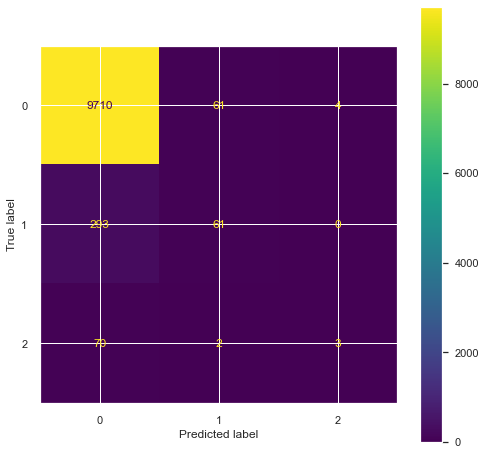

In [18]:
#KNN Model Fitting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(1) # random seed added to produce replicable outcome
knn_time= KNeighborsClassifier().fit(X_train, y_train) #fitting the K Neighbors Classifier with X train and Y train
y_pred = knn_time.predict(X_test) 
cm_time = confusion_matrix(y_test,y_pred)

print(cm_time)
print(classification_report(y_test, y_pred, digits=3)) #displaying the classification report 

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time)
display_cm_time.plot()


While the '0-30 minutes' class gives us great scores overall (accuracy, precision, f1 and recall), the other two classes are relatively poorer in their scores. This can be attributed to the non-uniform distrubtion of datapoints over these three classes. The first class '0-30 minutes' has a support of 9775 which is exponential in comparision to the other two classes which have a support score of 354 and 75 respectively. This could be resolved using oversampling, and is a technique that we have demonstrated further down. 

In [19]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Tunning the model - Finding neighbors using accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of K: ", k)


Accuracy Score:  0.9480825971715859
Number of K:  1
Accuracy Score:  0.9603900627869795
Number of K:  2
Accuracy Score:  0.9551814963700727
Number of K:  3
Accuracy Score:  0.9580377392452151
Number of K:  4
Accuracy Score:  0.9560215501572321
Number of K:  5
Accuracy Score:  0.9568616392378034
Number of K:  6
Accuracy Score:  0.9563575787307783
Number of K:  7
Accuracy Score:  0.9571135636110807
Number of K:  8
Accuracy Score:  0.9569455316776017
Number of K:  9
Accuracy Score:  0.9569875308376184
Number of K:  10
Accuracy Score:  0.9571135283176687
Number of K:  11
Accuracy Score:  0.9573235417644588
Number of K:  12
Accuracy Score:  0.9570715997444758
Number of K:  13
Accuracy Score:  0.9576175711779882
Number of K:  14
Accuracy Score:  0.957449574537921
Number of K:  15
Accuracy Score:  0.9576175711779881
Number of K:  16
Accuracy Score:  0.957617588824694
Number of K:  17
Accuracy Score:  0.9575755896646772
Number of K:  18
Accuracy Score:  0.9576176064713999
Number of K:  19
Accu

In [20]:
#Finding the number of neighbors associated with max accuracy
max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])


Max accuracy:  0.9603900627869795
Index of max accuracy: 1
Best number of neightbors: 2


Upon finding the best number of neighbors using their respective accuracy scores, we can determine that the model has its highest accuracy at 0.96039 when the number of neighbors is 2. 

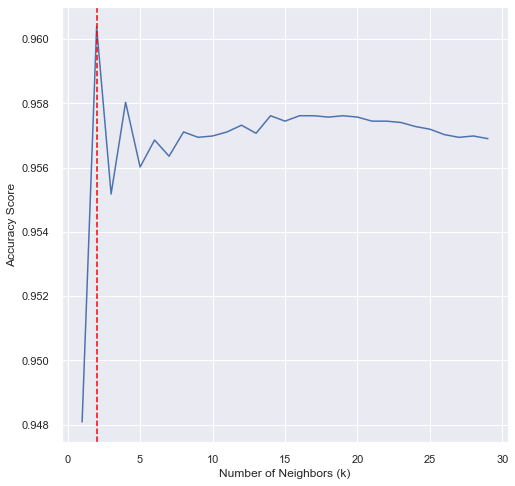

In [21]:
#depicting the accuracy score and associated number of neighbors from the CV results
highest_acc =(np.where(k_scores == np.max(k_scores))[0])+1
x_graph = list(range(1,30))
plt.plot(x_graph, k_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.axvline(x= highest_acc[0] ,linestyle='--',color="red")
plt.show()

Plotting the number of neighbors against the accuracy score gives us a graph with a clear spike (maximum) at K=2. This verifies our previous interpretation as well.

[[9710   61    4]
 [ 293   61    0]
 [  70    2    3]]
              precision    recall  f1-score   support

    0-30 Min      0.964     0.993     0.978      9775
   31-60 Min      0.492     0.172     0.255       354
     60+ Min      0.429     0.040     0.073        75

    accuracy                          0.958     10204
   macro avg      0.628     0.402     0.436     10204
weighted avg      0.944     0.958     0.947     10204



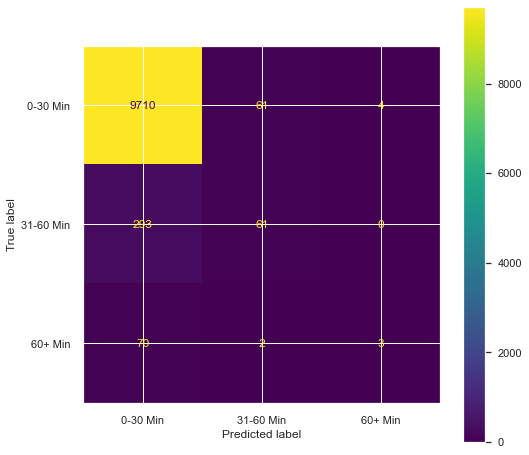

In [22]:
#KNN Model Fitting with best number of Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

knn_time = KNeighborsClassifier(n_neighbors=2) 
knn_time.fit(X_train, y_train)
knn_time= KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_time.predict(X_test)
cm_time = confusion_matrix(y_test,y_pred)

print(cm_time)
print(classification_report(y_test, y_pred, digits=3))

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_time.plot()

When we refit the model using K=2 we do not see any change in the overall results, which is indicative of the need to distribute the data more uniformly throughout the classes. Thus we have executed oversampling below in order to achieve a better distriubtion and thereby achieve a better depiction of the results.

### KNN with oversampling 

In [23]:
#Conducting oversampling to improve classification model

#importing the libraries and packages required for oversampling
from sklearn.datasets import make_classification
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#defining the random oversampler function
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter

#displaying the distribution of data after oversampling
print(sorted(Counter(y_resampled).items()))


[('0-30 Min', 32550), ('31-60 Min', 32550), ('60+ Min', 32550)]


In [24]:
#conducting the train-test split on the oversampled data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled.to_numpy(),y_resampled.to_numpy(), test_size=0.3,random_state=1)

[[8795  874  200]
 [   0 9683    0]
 [   0    0 9743]]
              precision    recall  f1-score   support

    0-30 Min      1.000     0.891     0.942      9869
   31-60 Min      0.917     1.000     0.957      9683
     60+ Min      0.980     1.000     0.990      9743

    accuracy                          0.963     29295
   macro avg      0.966     0.964     0.963     29295
weighted avg      0.966     0.963     0.963     29295



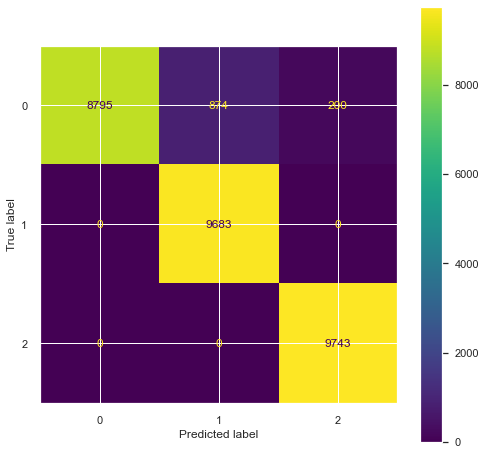

In [25]:
#KNN Model Fitting
np.random.seed(1)
knn_time= KNeighborsClassifier().fit(X1_train, y1_train) #refitting the knn model on the new X train and Y train data (After resampling)
y1_pred = knn_time.predict(X1_test)
cm_time = confusion_matrix(y1_test,y1_pred)

print(cm_time)
print(classification_report(y1_test, y1_pred, digits=3))

#displaying confusion matrix
display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time)
display_cm_time.plot()

Once the data has been uniformly distributed throughout the three classes, the results of the knn classification are much better. We can see a similar support score across the classes which is indicative of a evenly distributed dataset, and the resultant scores (accuracy, precision, recall and f1) are all significantly higher that pre-oversampling. 

Thus, by oversampling the data, we were able to achieve the best result so far.

In [26]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Tunning the model - Finding neighbors using accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X1_train, y1_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of K: ", k)

Accuracy Score:  0.9872284750083791
Number of K:  1
Accuracy Score:  0.9872284750083791
Number of K:  2
Accuracy Score:  0.9736815293876431
Number of K:  3
Accuracy Score:  0.9736815293876431
Number of K:  4
Accuracy Score:  0.9599883785784027
Number of K:  5
Accuracy Score:  0.9599883785784027
Number of K:  6
Accuracy Score:  0.9479190506989331
Number of K:  7
Accuracy Score:  0.9478459042300689
Number of K:  8
Accuracy Score:  0.9365079832531675
Number of K:  9
Accuracy Score:  0.9364494652219862
Number of K:  10
Accuracy Score:  0.9250384363002702
Number of K:  11
Accuracy Score:  0.925053066878178
Number of K:  12
Accuracy Score:  0.9127935928513062
Number of K:  13
Accuracy Score:  0.9125595335679305
Number of K:  14
Accuracy Score:  0.9019092690147217
Number of K:  15
Accuracy Score:  0.9015142583927853
Number of K:  16
Accuracy Score:  0.8919465217705824
Number of K:  17
Accuracy Score:  0.8914491356273405
Number of K:  18
Accuracy Score:  0.8823787723070298
Number of K:  19
Acc

In [27]:
#Finding the number of neighbors associated with max accuracy
max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])

Max accuracy:  0.9872284750083791
Index of max accuracy: 0
Best number of neightbors: 1


Upon finding the best number of neighbors using their respective accuracy scores, we can determine that the model has its highest accuracy at 0.98722 when the number of neighbors is 1 (the highest accuracy score increased after the oversampling)

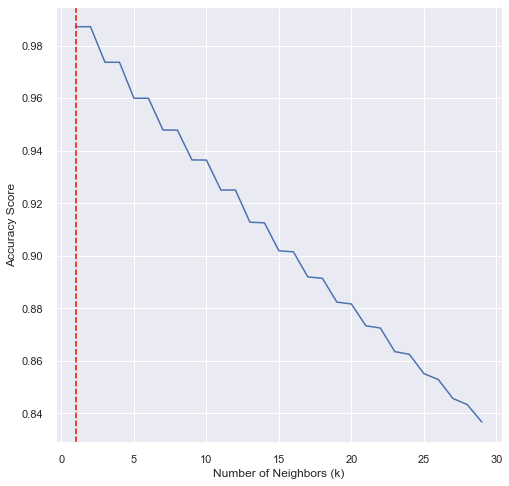

In [28]:
#depicting the accuracy score and associated number of neighbors from the CV results
highest_acc =(np.where(k_scores == np.max(k_scores))[0])+1
x_graph = list(range(1,30))
plt.plot(x_graph, k_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.axvline(x= highest_acc[0] ,linestyle='--',color="red")
plt.show()

Plotting the number of neighbors against the accuracy score gives us a graph with a clear spike (maximum) at K=1. This verifies our previous interpretation as well.

[[8795  874  200]
 [   0 9683    0]
 [   0    0 9743]]
              precision    recall  f1-score   support

    0-30 Min      1.000     0.891     0.942      9869
   31-60 Min      0.917     1.000     0.957      9683
     60+ Min      0.980     1.000     0.990      9743

    accuracy                          0.963     29295
   macro avg      0.966     0.964     0.963     29295
weighted avg      0.966     0.963     0.963     29295



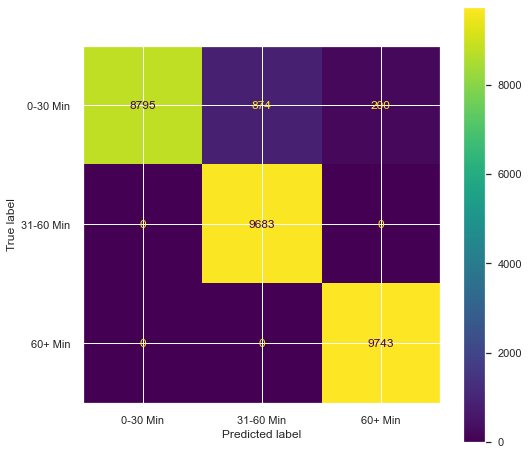

In [29]:
#KNN Model Fitting with best number of Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(1)
knn_time = KNeighborsClassifier(n_neighbors=1) #assigning the number of neighbers as 1 (has the highest accuracy score)
knn_time.fit(X1_train, y1_train)
knn_time= KNeighborsClassifier().fit(X1_train, y1_train)
y2_pred = knn_time.predict(X1_test)
cm_time = confusion_matrix(y1_test,y2_pred)

print(cm_time)
print(classification_report(y1_test, y2_pred, digits=3))

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_time.plot()

The KNN model with oversampling slightly increased the accuracy(from 0.958 to 0.963) and significantly imrpoved precision, recall and F1 scores accross the three classes by correcting the imbalance of samples in each category.


**We can thus conclude the the KNN model works best with a uniform distribution of data accross the classes, which can be achieved by oversampline in situations where the data is not uniformly distributed.**

## MODEL 2 - Naive Bayes Model

### NB Model (without oversampling)

In [30]:
# Fitting data to NaiveBayes classifier
from sklearn.naive_bayes import GaussianNB
np.random.seed(1)
modelNB = GaussianNB()
CV_error = np.mean(cross_val_score(modelNB, X, y, cv=10))
print("Accuracy: ",CV_error)

Accuracy:  0.9314631239800308


              precision    recall  f1-score   support

    0-30 Min      0.960     0.967     0.963      9775
   31-60 Min      0.070     0.042     0.053       354
     60+ Min      0.099     0.200     0.133        75

    accuracy                          0.929     10204
   macro avg      0.376     0.403     0.383     10204
weighted avg      0.923     0.929     0.926     10204



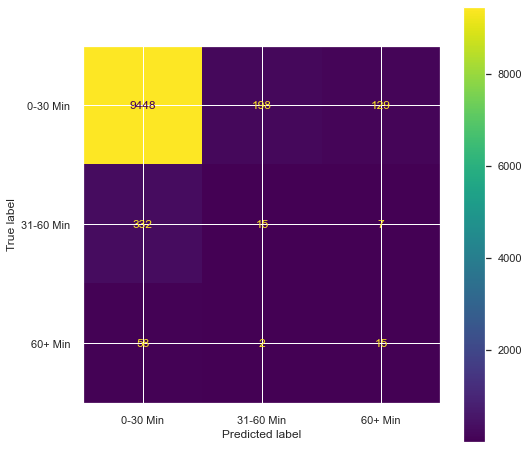

In [31]:
np.random.seed(1)# applying random seed to produce replicable results
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

cm_time = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=3))

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_time.plot()

The Naive Bayes model gives a high accuracy score (0.929) and high precision,recall and F1 scores for the '0-30 minutes' class, but gives a lot poorer results for the other two classes. This can once again be attributed to the non-uniform distribution of data.

We can try oversampling to account for the data imbalance

### NB Model with oversampling

              precision    recall  f1-score   support

    0-30 Min      0.460     0.199     0.277      9869
   31-60 Min      0.370     0.845     0.514      9683
     60+ Min      0.760     0.226     0.349      9743

    accuracy                          0.421     29295
   macro avg      0.530     0.423     0.380     29295
weighted avg      0.530     0.421     0.379     29295



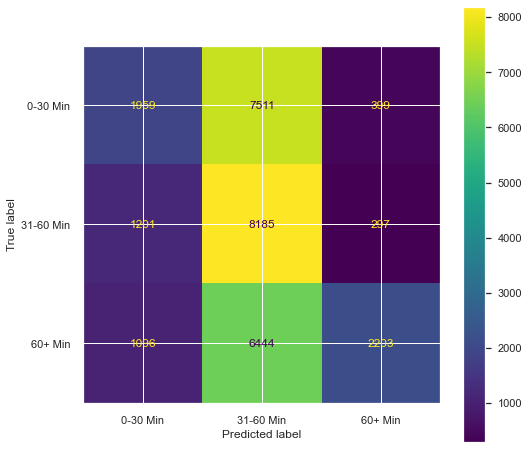

In [32]:
np.random.seed(1) #setting random seed
modelNB.fit(X1_train, y1_train) #fitting oversampled X-train and Y-train data
y_pred_3 = modelNB.predict(X1_test)

cm_time = confusion_matrix(y1_test,y_pred_3)
print(classification_report(y1_test, y_pred_3, digits=3))

#displaying confusion matrix
display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_time.plot()

After oversampling, the NB model gives us a better representation of the data, but the overall scores accorss the classes are relatively low in compparison to the KNN model. 
The accuracy here is 0.421 whereas the accuracy in the KNN model was 0.963 (more than double). 
Similarly the precision, recall and f1 scores are alo relatively lower in comparison to the KNN model.

**Thus we can conclude that the KNN model performs better than the Naive Bayes Model in this classification.**

## MODEL 3 - Logistic Regression

### Logistic Regression (without oversampling)

Accuracy of logistic regression classifier on test set: 0.96
              precision    recall  f1-score   support

    0-30 Min      0.958     1.000     0.978      9775
   31-60 Min      0.000     0.000     0.000       354
     60+ Min      0.400     0.027     0.050        75

    accuracy                          0.958     10204
   macro avg      0.453     0.342     0.343     10204
weighted avg      0.921     0.958     0.938     10204



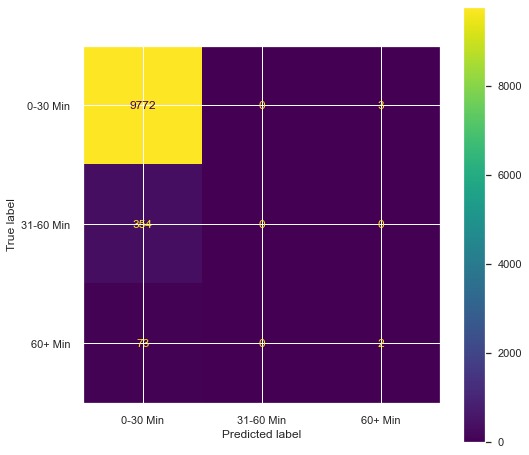

In [33]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
cm_time = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred, digits=3, zero_division=0))# zero division applied to account for the model's inability to predict any data in the 31-60 minc category correctly

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_time.plot()

As seen with the KNN and NB models, The Logistic Regression model gives a high accuracy score (0.958) and high precision,recall and F1 scores for the '0-30 minutes' class, but gives a lot poorer results for the other two classes. This can once again be attributed to the non-uniform distribution of data.

### Logistics Regression with oversampling

Accuracy of logistic regression classifier on test set: 0.44
              precision    recall  f1-score   support

    0-30 Min      0.417     0.465     0.440      9869
   31-60 Min      0.400     0.409     0.404      9683
     60+ Min      0.516     0.443     0.477      9743

    accuracy                          0.439     29295
   macro avg      0.444     0.439     0.440     29295
weighted avg      0.444     0.439     0.440     29295



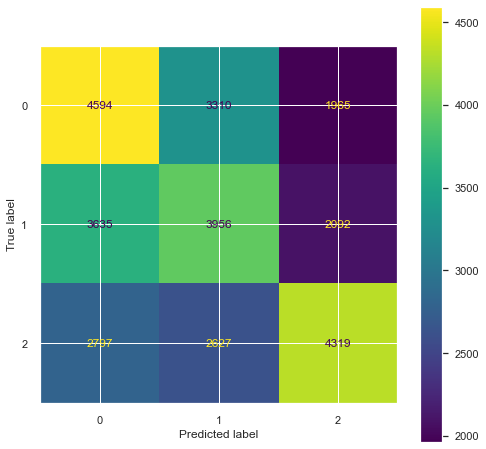

In [66]:
#Logistics Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X1_train, y1_train)
y_pred_4 = clf.predict(X1_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))
cm_time = confusion_matrix(y1_test,y_pred_4)
print(classification_report(y1_test, y_pred_4, digits=3))

display_cm_time = ConfusionMatrixDisplay(confusion_matrix=cm_time)
display_cm_time.plot()

After oversampling, the logistic regression model gives us a better representation of the data, but the overall scores accorss the classes are still relatively low in compparison to the KNN model. The accuracy here is 0.439 whereas the accuracy in the KNN model was 0.963 (more than double). Similarly the precision, recall and f1 scores are alo relatively lower in comparison to the KNN model. 

**While the logisitc regression model does give a better performance than the Naive Bayes model, our best classification model for the Stop Duration Minutes is the KNN Model.**

# QUESTION 2 - CLASSIFICATION FOR FRISK OCCURANCE

PCA was applied into these models given the large number of features we have in the dataset. This technique could potentially provide better results into out models. 

Summary of models used:
- KNN without PCA
- KNN with PCA
- Naive Bayes without PCA
- Naive Bayes with PCA
- Logistic Regression without PCA
- Logistic Regression with PCA

In [11]:
## Splitting the dataset to create train and test subsets

#preparing the data for frisked flag classification modeling
X2 = clean_full_data[clean_full_data.columns.difference(['FRISKED_FLAG'])]
y2 = clean_full_data['FRISKED_FLAG']

#splitting the train-test datasets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.to_numpy(), y2.to_numpy(), test_size=0.3, random_state=1)

labels=['NOT FRISKED', 'FRISKED']


### Initializing Principal Component Analysis for Feature Extraction

Text(0, 0.5, 'PC2')

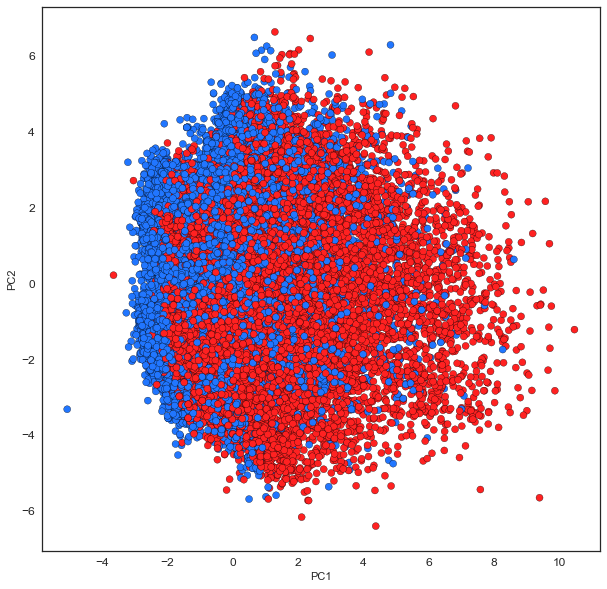

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#attempting to understand how PCA works 

#Scaling the data
np.random.seed(1)
scaler = StandardScaler()
scaler.fit(clean_full_data)
scaled = scaler.transform(clean_full_data)

#Obtaining principal components
pca = PCA().fit(scaled)

#trying out PCA with just 2 principal components
pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plotting the principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in clean_full_data["FRISKED_FLAG"]]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Proportion of Variance Explained')

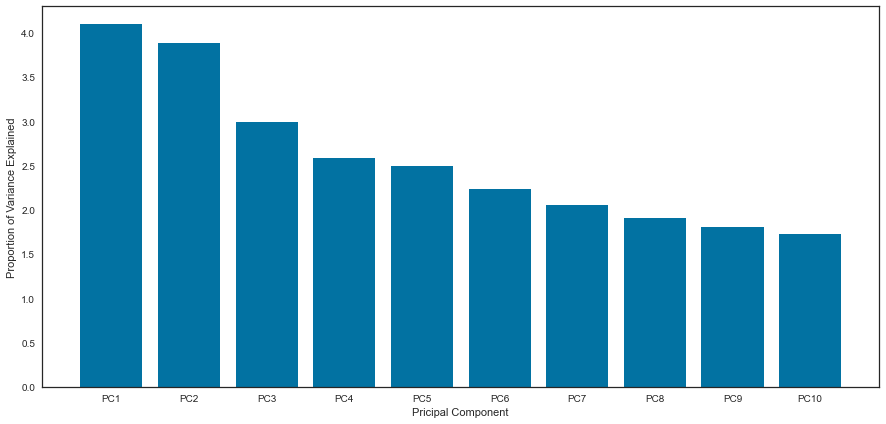

In [13]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained') # displays the top 10 principal components

In [14]:
#importing the required packages for PCA and scaling
from sklearn import decomposition, datasets 
from sklearn.preprocessing import StandardScaler
df = clean_full_data

np.random.seed(1)
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X2)

# fitting x dataset with the top 10 principal components
pca = decomposition.PCA(n_components=10)

X_std_pca = pca.fit_transform(X_std)

#dispalying the scaled (numeric) top 10 principal components in a dataframe
print(X_std_pca.shape)
print(X_std_pca)

(34011, 10)
[[ 3.10001852 -1.00676315 -0.43838942 ...  0.36729437 -1.41617326
   1.85122251]
 [-1.2930818  -0.86238986 -1.3870889  ... -1.51679862  0.48400058
   1.49151918]
 [-1.43982058 -0.83263732 -1.15542498 ... -1.23672471  0.61911577
   1.66686141]
 ...
 [-2.35576428  0.6826893   1.2414187  ... -0.34907956  1.60694542
   1.29701073]
 [-2.30632972  1.40111729  1.19495205 ... -0.71651259  1.53779613
   1.48243852]
 [-2.20897631  2.67165024  1.8797463  ...  1.28256392 -0.26321662
   0.94128859]]


In [15]:
# Assigning the principal components to a new variable for further analysis
X4 = X_std_pca
y4 = clean_full_data['FRISKED_FLAG']

#splitting the train and test data based on the new X and Y datasets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=1)
#print(y4.isnull().sum())

X4_train

array([[-0.70072746, -2.14559958,  0.32396971, ..., -1.69395758,
         0.34719421,  1.12592288],
       [-2.09575635,  0.26870964, -0.37295317, ...,  1.02541405,
         0.31668375, -0.76220972],
       [-1.26107704, -0.22002705, -1.19749413, ...,  0.65711083,
        -1.20079785, -0.97829456],
       ...,
       [-0.41270218, -2.89474583, -2.22024174, ..., -0.17324564,
         0.5293435 ,  1.2241667 ],
       [-1.56983106,  0.7458724 , -0.61882278, ...,  0.54206828,
        -0.55348087, -0.80061667],
       [-0.17103226,  4.51985293, -0.76386249, ...,  1.8837568 ,
         0.41732703,  0.06045127]])

## MODEL 1 - KNN MODEL

#### (Before conducting PCA)

[[2264 2125]
 [1633 4182]]
              precision    recall  f1-score   support

           0      0.581     0.516     0.546      4389
           1      0.663     0.719     0.690      5815

    accuracy                          0.632     10204
   macro avg      0.622     0.618     0.618     10204
weighted avg      0.628     0.632     0.628     10204



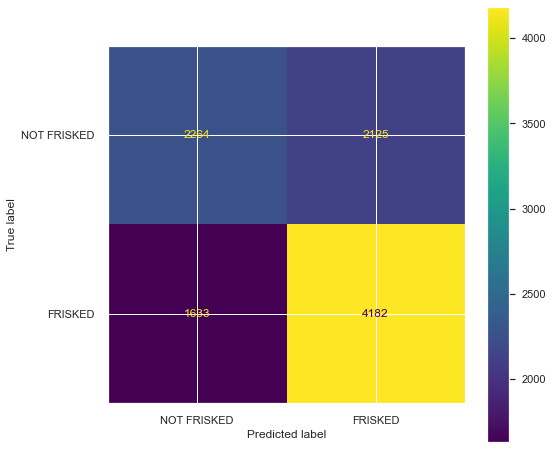

In [40]:
#Fitting data to knn model without tweaks
np.random.seed(1)
knn_frisk= KNeighborsClassifier().fit(X2_train, y2_train)
y2_pred = knn_frisk.predict(X2_test)
cm_frisk = confusion_matrix(y2_test,y2_pred)

print(cm_frisk)
print(classification_report(y2_test, y2_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)
display_cm_frisk.plot()

The KNN model gives an above average accuracy. The precison,recall and F1 scores across the classes are just above average as well, and the support values of the classes indicates the the reason for the absence of higher values is not a non uniform distribution, but rather that we would need to conduct a feature extraction. Simply using all the variables might not be the best option. 

Thus, there is certainly room for improvement. 

In [41]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Finding neighbors using accuracy
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X2_train, y2_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of k neighbors: ", k, "\n")

    

Accuracy Score:  0.6340570129773875
Number of k neighbors:  1 

Accuracy Score:  0.5862552631300315
Number of k neighbors:  2 

Accuracy Score:  0.6186830263394733
Number of k neighbors:  3 

Accuracy Score:  0.6003682867519119
Number of k neighbors:  4 

Accuracy Score:  0.6125081439547679
Number of k neighbors:  5 

Accuracy Score:  0.6022587607071388
Number of k neighbors:  6 

Accuracy Score:  0.6188088473524646
Number of k neighbors:  7 

Accuracy Score:  0.6080135985515583
Number of k neighbors:  8 

Accuracy Score:  0.6198589498798259
Number of k neighbors:  9 

Accuracy Score:  0.6080138279587348
Number of k neighbors:  10 

Accuracy Score:  0.6174229985988516
Number of k neighbors:  11 

Accuracy Score:  0.6110386145218272
Number of k neighbors:  12 

Accuracy Score:  0.6189777969146502
Number of k neighbors:  13 

Accuracy Score:  0.6141470994109529
Number of k neighbors:  14 

Accuracy Score:  0.6192716675078265
Number of k neighbors:  15 

Accuracy Score:  0.614062836390331

In [42]:
# Finding the number of neighbors associated with max accuracy
max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])

Max accuracy:  0.6340570129773875
Index of max accuracy: 0
Best number of neightbors: 1


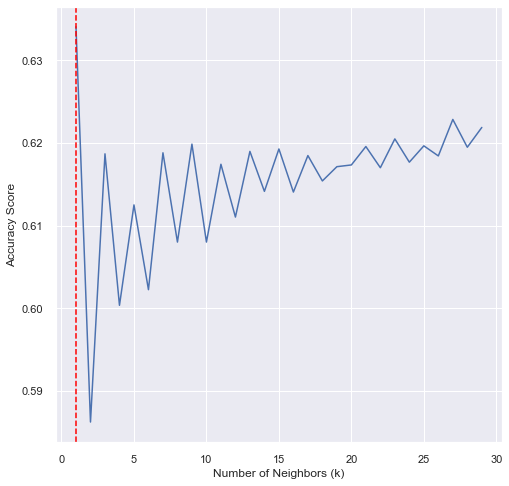

In [43]:
# depicting the accuracy score and associated number of neighbors from the CV results
highest_acc =(np.where(k_scores == np.max(k_scores))[0])+1
x_graph = list(range(1,30))
plt.plot(x_graph, k_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.axvline(x= highest_acc,linestyle='--',color="red")
plt.show()

Upon plotting the best number of neighbors using their respective accuracy scores, we can determine that the model has its highest accuracy at 0.634 when the number of neighbors is 1.

[[2264 2125]
 [1633 4182]]
              precision    recall  f1-score   support

           0      0.581     0.516     0.546      4389
           1      0.663     0.719     0.690      5815

    accuracy                          0.632     10204
   macro avg      0.622     0.618     0.618     10204
weighted avg      0.628     0.632     0.628     10204



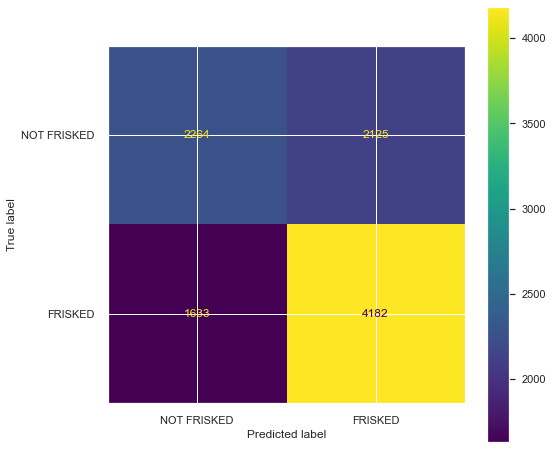

In [44]:
# Refitting the model with number of neighbors associated with highest accuracy
np.random.seed(1)
knn_frisk = KNeighborsClassifier(n_neighbors=1)
knn_frisk.fit(X2_train, y2_train)
y_pred = knn_frisk.predict(X2_test)
cm_frisk = confusion_matrix(y2_test,y2_pred)
print(cm_frisk)
print(classification_report(y2_test, y2_pred, digits=3))

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)
display_cm_frisk.plot()

In an attempt to improve the model by applying the number of neighbors with the highest accuracy score, we find that it did not improve the model at all. Thus, our next step is to try fitting the model with the top 10 features obtained through PCA.

#### Conducting PCA

[[3010 1379]
 [1563 4252]]
              precision    recall  f1-score   support

           0      0.658     0.686     0.672      4389
           1      0.755     0.731     0.743      5815

    accuracy                          0.712     10204
   macro avg      0.707     0.709     0.707     10204
weighted avg      0.713     0.712     0.712     10204



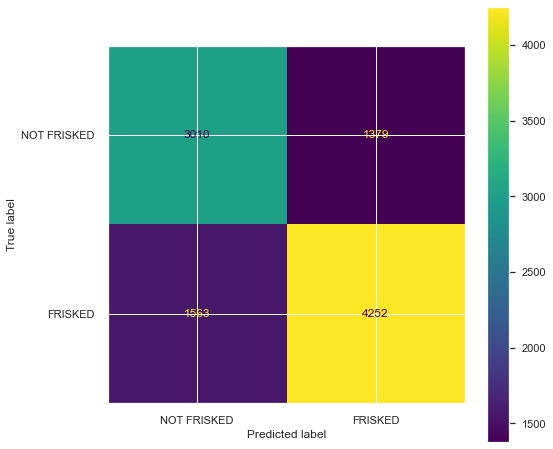

In [45]:
#Redoing KNN with PCA
np.random.seed(1)
knn_frisk= KNeighborsClassifier().fit(X4_train, y4_train)
y4_pred = knn_frisk.predict(X4_test)
cm_frisk = confusion_matrix(y4_test,y4_pred)

print(cm_frisk)
print(classification_report(y4_test, y4_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk,display_labels=labels)
display_cm_frisk.plot()


Upon using PCA for feature extraction and rerunning the KNN model, the results have definitely become better across the board. There is a significant improvement in the accuracy(increased from 0.63 to 0.712), precision, recall and f1 scores accross the classes, and while we still haven't reached the best poosible numbers, having these scores in the range of 0.65-0.75 is an acceptable performance.


In [46]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Finding neighbors using accuracy
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X4_train, y4_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of k neighbors: ", k, "\n")

Accuracy Score:  0.6883686855674651
Number of k neighbors:  1 

Accuracy Score:  0.6616537257490145
Number of k neighbors:  2 

Accuracy Score:  0.6981970360592789
Number of k neighbors:  3 

Accuracy Score:  0.6857639082512468
Number of k neighbors:  4 

Accuracy Score:  0.7042876377766563
Number of k neighbors:  5 

Accuracy Score:  0.697315688980338
Number of k neighbors:  6 

Accuracy Score:  0.7072287613071268
Number of k neighbors:  7 

Accuracy Score:  0.7010124444569932
Number of k neighbors:  8 

Accuracy Score:  0.7057584730658328
Number of k neighbors:  9 

Accuracy Score:  0.7023981873303711
Number of k neighbors:  10 

Accuracy Score:  0.7086988907280678
Number of k neighbors:  11 

Accuracy Score:  0.7036163394379171
Number of k neighbors:  12 

Accuracy Score:  0.708153131055026
Number of k neighbors:  13 

Accuracy Score:  0.706976925167379
Number of k neighbors:  14 

Accuracy Score:  0.7081943537599836
Number of k neighbors:  15 

Accuracy Score:  0.7055063192853791
N

In [47]:
# Finding the number of neighbors associated with max accuracy

max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])

Max accuracy:  0.7131935243648069
Index of max accuracy: 26
Best number of neightbors: 27


Upon finding the best number of neighbors using their respective accuracy scores, we can determine that the model has its highest accuracy at 0.7132 when the number of neighbors is 27 (the highest accuracy score increased after the oversampling and the corresponding best number of neighbors changed as well)

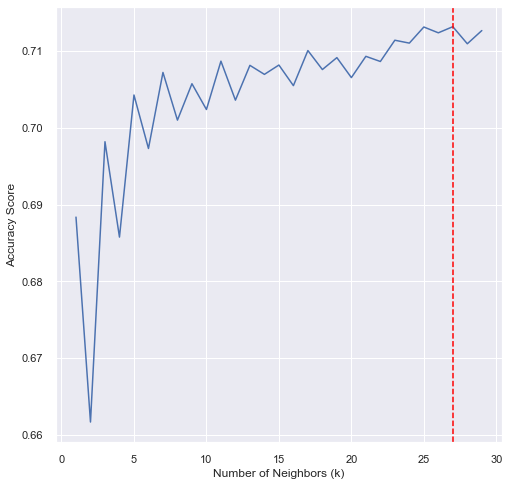

In [48]:
# Depicting the accuracy score and associated number of neighbors from the CV results
highest_acc =(np.where(k_scores == np.max(k_scores))[0])+1
x_graph = list(range(1,30))
plt.plot(x_graph, k_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.axvline(x= highest_acc,linestyle='--',color="red")
plt.show()

Upon plotting the best number of neighbors using their respective accuracy scores, we can determine that the model has its highest accuracy at 0.713 when the number of neighbors is 27.

[[3095 1294]
 [1549 4266]]
              precision    recall  f1-score   support

           0      0.666     0.705     0.685      4389
           1      0.767     0.734     0.750      5815

    accuracy                          0.721     10204
   macro avg      0.717     0.719     0.718     10204
weighted avg      0.724     0.721     0.722     10204



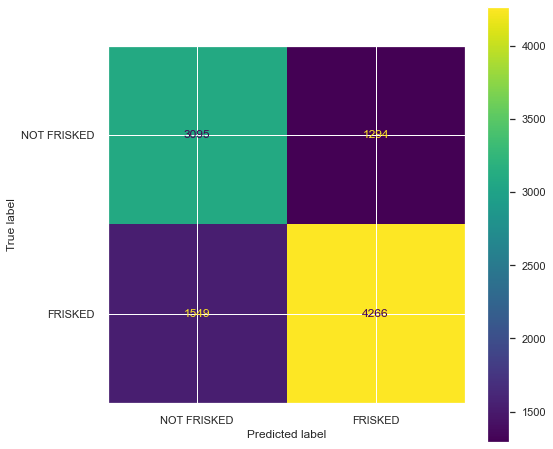

In [49]:
# Refitting the model with number of neighbors associated with highest accuracy
np.random.seed(1)
knn_frisk = KNeighborsClassifier(n_neighbors=21)
knn_frisk.fit(X4_train, y4_train)
y5_pred = knn_frisk.predict(X4_test)
cm_frisk = confusion_matrix(y4_test,y5_pred)
print(cm_frisk)
print(classification_report(y4_test, y5_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)
display_cm_frisk.plot()

We can conclude that KNN with Principal Component Analysis produced the best results and the accuracy score increased to 72% from 63%. The f1 score for not frisked and frisked increased to 69% and 75% respectively as well, signifying an overall better performance. 

## MODEL 2 - NAIVE BAYES

#### Before conducting PCA

In [50]:
from sklearn.naive_bayes import GaussianNB
#Fitting Naive Bayes Model
np.random.seed(1) 
modelNB = GaussianNB()
CV_error = np.mean(cross_val_score(modelNB, X2, y2, cv=10))
print("Accuracy: ",CV_error)

Accuracy:  0.6070378892261347


              precision    recall  f1-score   support

           0      0.587     0.697     0.637      4389
           1      0.733     0.629     0.677      5815

    accuracy                          0.658     10204
   macro avg      0.660     0.663     0.657     10204
weighted avg      0.670     0.658     0.660     10204



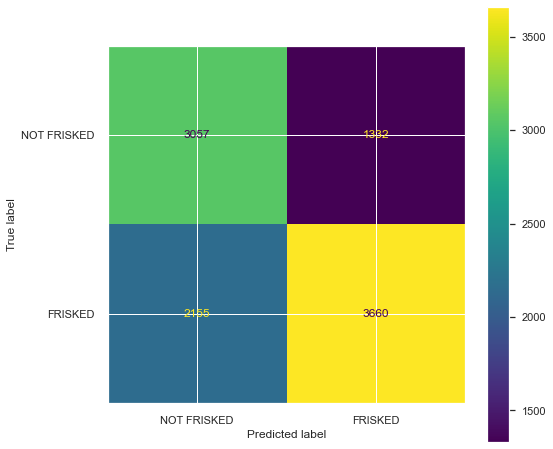

In [51]:
modelNB.fit(X2_train, y2_train)
y6_pred = modelNB.predict(X2_test)

cm_frisk = confusion_matrix(y2_test,y6_pred)
print(classification_report(y2_test, y6_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk,display_labels=labels)
display_cm_frisk.plot()

Similar to KNN, the NB model does a decent job in terms of accuracy and f1 score, while there is definitely a room for improvement. We will be conducting a principal component analysis to acheive a better performs based on the most significant features.  

We can also note that the NB model without PCA has a slightly better performance when compared to the KNN model without PCA (accuracy scores of 0.658 vs 0.632)

#### Conducting PCA

In [52]:
#Fitting Naive Bayes Model
np.random.seed(1)
modelNB = GaussianNB()
CV_error = np.mean(cross_val_score(modelNB, X4, y4, cv=10))
print("Accuracy: ",CV_error)

Accuracy:  0.645407858912057


              precision    recall  f1-score   support

           0      0.574     0.739     0.646      4389
           1      0.749     0.586     0.657      5815

    accuracy                          0.652     10204
   macro avg      0.661     0.663     0.652     10204
weighted avg      0.674     0.652     0.653     10204



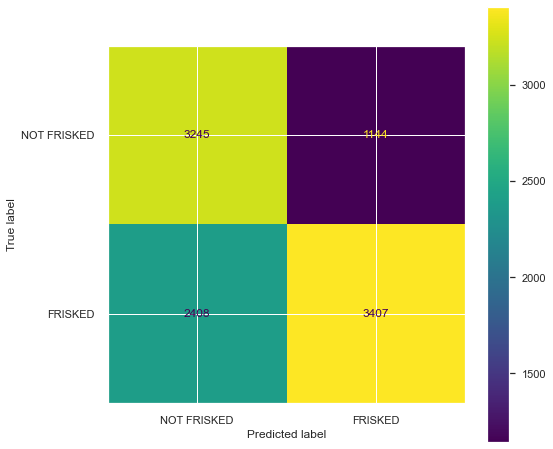

In [53]:
#Producing classification report and confusion matrix with PCA
modelNB.fit(X4_train, y4_train)
y7_pred = modelNB.predict(X4_test)

cm_frisk = confusion_matrix(y4_test,y7_pred)
print(classification_report(y4_test, y7_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk,display_labels=labels)
display_cm_frisk.plot()


After conducting PCA, while there a minute changes in the performance (accuracy and f1 scores), there appears to be no significant improvement in the overall performance of the NB model. 


We can conclude that, for this classification of 'Frisked Flag', the KNN model with PCA performs better than the NB model in any situation (with or without PCA).

## MODEL 3 - LOGISTIC REGRESSION

#### Before conducting PCA 

Accuracy of logistic regression classifier on test set: 0.57
              precision    recall  f1-score   support

           0      0.505     0.061     0.109      4389
           1      0.574     0.955     0.717      5815

    accuracy                          0.570     10204
   macro avg      0.539     0.508     0.413     10204
weighted avg      0.544     0.570     0.455     10204



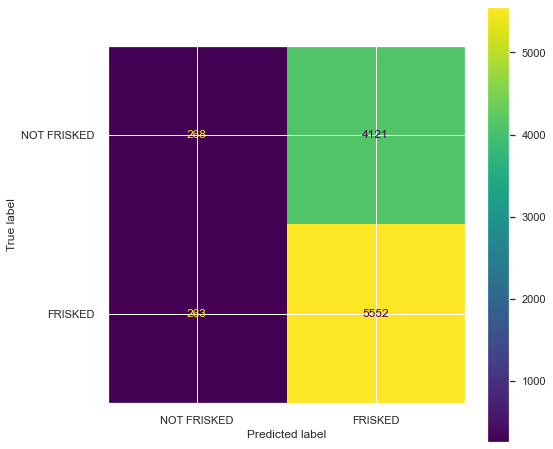

In [54]:
from sklearn.linear_model import LogisticRegression
#defining the logistic regression 
clf = LogisticRegression(random_state=1, max_iter=10000).fit(X2_train, y2_train)
y8_pred = clf.predict(X2_test)

#printing classification report
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X2_test, y2_test)))
cm_time = confusion_matrix(y2_test,y8_pred)
print(classification_report(y2_test, y8_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

#displaying confusion matrix
display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_frisk.plot()

The Logistic Regression model gives an average accuracy score (0.570) and average precision scores. The recall and F1 scores for the 'Not Frisked' class appear to be low, whereas the socres for the 'Frisked' class are a lot higher. We can conduct PCA to try and extract a better performance from the logistic regression model.

### Using PCA 

Accuracy of logistic regression classifier on test set: 0.71
              precision    recall  f1-score   support

           0      0.668     0.647     0.657      4389
           1      0.740     0.758     0.749      5815

    accuracy                          0.710     10204
   macro avg      0.704     0.702     0.703     10204
weighted avg      0.709     0.710     0.709     10204



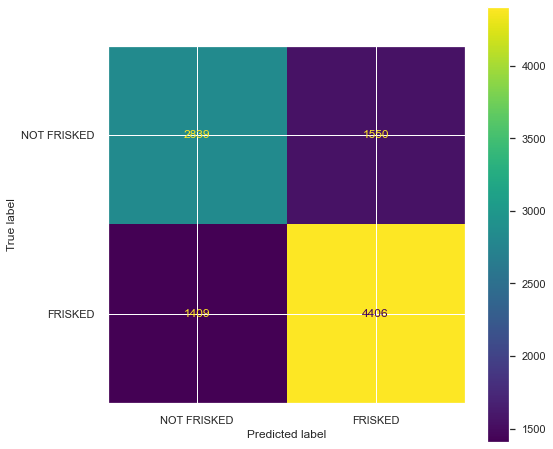

In [55]:
from sklearn.linear_model import LogisticRegression
#defining the logistic regression 
clf = LogisticRegression(random_state=1, max_iter=10000).fit(X4_train, y4_train)
y9_pred = clf.predict(X4_test)

#printing classification report
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X4_test, y4_test)))
cm_time = confusion_matrix(y4_test,y9_pred)
print(classification_report(y4_test, y9_pred, digits=3))

labels=['NOT FRISKED', 'FRISKED']

#displaying confusion matrix
display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_time,display_labels=labels)
display_cm_frisk.plot()


In logistic regression model, the results after conducting the PCA was better than the results before conducting PCA. 

After running the KNN, NB, and Logistic Regression models, we can conclude that the Logistic Regression model with PCA and the KNN model with PCA and CV selection for accuracy score did the best job classifying our data.

# QUESTION 3 - CLASSIFICATION OF SEARCHED FLAG

PCA was applied into these models given the large number of features we have in the dataset. This technique could potentially provide better results into out models. 

Summary of models used:
- KNN without PCA
- KNN with PCA
- Naive Bayes without PCA
- Naive Bayes with PCA
- Logistic Regression without PCA
- Logistic Regression with PCA

In [16]:
X5 = clean_full_data[clean_full_data.columns.difference(['SEARCHED_FLAG'])]
y5 = clean_full_data['SEARCHED_FLAG']


X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=1)
print(y5.isnull().sum())


X5_train


0


,ASK_FOR_CONSENT_FLG,BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG,BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG,CONSENT_GIVEN_FLG,DAY,DEMEANOR_CODE,DEMEANOR_OF_PERSON_STOPPED,FIREARM_FLAG,FRISKED_FLAG,ID_CARD_IDENTIFIES_OFFICER_FLAG,...,SUSPECT_HAIR_COLOR,SUSPECT_HEIGHT,SUSPECT_OTHER_DESCRIPTION,SUSPECT_RACE_DESCRIPTION,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_WEIGHT,VERBAL_IDENTIFIES_OFFICER_FLAG,WEAPON_FOUND_FLAG,YEAR
2112,1,0,0,1,6,0,355,0,1,0,...,2,26,3759,7,20,2,58,0,0,2020
19375,0,0,1,1,1,2,2260,0,1,0,...,3,24,54,4,17,2,47,0,0,2019
16280,0,0,1,0,5,2,114,0,1,0,...,3,19,54,4,27,2,79,0,0,2019
23322,2,0,1,2,3,2,749,0,1,0,...,3,26,54,4,19,2,73,0,0,2018
820,0,0,0,0,0,0,492,0,0,0,...,3,21,7781,4,10,2,22,0,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1,0,0,1,0,0,749,0,1,0,...,2,18,54,4,29,1,130,0,0,2020
32511,2,0,0,2,2,2,2718,0,1,0,...,3,19,54,4,15,2,58,1,0,2018
5192,0,0,1,0,6,0,3482,0,1,0,...,3,31,54,4,19,2,79,0,0,2020
12172,1,0,1,1,0,2,1191,0,1,0,...,3,31,54,8,10,2,79,0,0,2019


In [17]:
X5_train.columns # double checking the columns included in X5_train

Index(['ASK_FOR_CONSENT_FLG',
       'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
       'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG', 'CONSENT_GIVEN_FLG',
       'DAY', 'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 'FIREARM_FLAG',
       'FRISKED_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'ISSUING_OFFICER_COMMAND_CODE', 'ISSUING_OFFICER_RANK',
       'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION', 'KNIFE_CUTTER_FLAG',
       'LOCATION_IN_OUT_CODE', 'MONTH', 'OBSERVED_DURATION_MINUTES',
       'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_IN_UNIFORM_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_CONTRABAND_FLAG',
       'OTHER_PERSON_STOPPED_FLAG', 'OTHER_WEAPON_FLAG',
       'PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
       'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
       'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG',
       'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG

In [18]:
#Transforming variables into PCA
np.random.seed(1)
std_slc = StandardScaler()
X_std2 = std_slc.fit_transform(X5)
    
pca2 = decomposition.PCA(n_components=10)

X_std_pca2 = pca2.fit_transform(X_std)

print(X_std_pca2.shape)
print(X_std_pca2)


(34011, 10)
[[ 3.10001852 -1.00676315 -0.43838942 ...  0.36729437 -1.41617326
   1.85122251]
 [-1.2930818  -0.86238986 -1.3870889  ... -1.51679862  0.48400058
   1.49151918]
 [-1.43982058 -0.83263732 -1.15542498 ... -1.23672471  0.61911577
   1.66686141]
 ...
 [-2.35576428  0.6826893   1.2414187  ... -0.34907956  1.60694542
   1.29701073]
 [-2.30632972  1.40111729  1.19495205 ... -0.71651259  1.53779613
   1.48243852]
 [-2.20897631  2.67165024  1.8797463  ...  1.28256392 -0.26321662
   0.94128859]]


In [19]:
X6 = X_std_pca2 
y6 = clean_full_data['SEARCHED_FLAG']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=1)
print(y6.isnull().sum())

X6_train

0


array([[-0.70072746, -2.14559958,  0.32396971, ..., -1.69395758,
         0.34719421,  1.12592288],
       [-2.09575635,  0.26870964, -0.37295317, ...,  1.02541405,
         0.31668375, -0.76220972],
       [-1.26107704, -0.22002705, -1.19749413, ...,  0.65711083,
        -1.20079785, -0.97829456],
       ...,
       [-0.41270218, -2.89474583, -2.22024174, ..., -0.17324564,
         0.5293435 ,  1.2241667 ],
       [-1.56983106,  0.7458724 , -0.61882278, ...,  0.54206828,
        -0.55348087, -0.80061667],
       [-0.17103226,  4.51985293, -0.76386249, ...,  1.8837568 ,
         0.41732703,  0.06045127]])

## MODEL 1 - KNN MODEL 

### Not Using PCA 

              precision    recall  f1-score   support

           0      0.667     0.755     0.708      6362
           1      0.481     0.376     0.422      3842

    accuracy                          0.612     10204
   macro avg      0.574     0.565     0.565     10204
weighted avg      0.597     0.612     0.600     10204



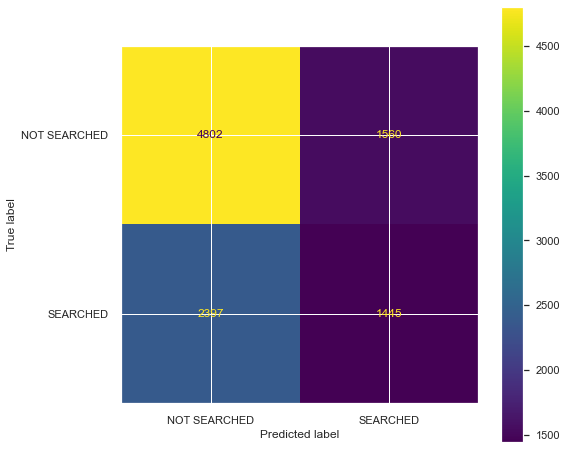

In [61]:
#Fitting the data to KNN for initial results
np.random.seed(1)
knn_frisk= KNeighborsClassifier().fit(X5_train, y5_train)
y11_pred = knn_frisk.predict(X5_test)
cm_frisk = confusion_matrix(y5_test,y11_pred)

#print(cm_frisk)
print(classification_report(y5_test, y11_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)

sns.set(rc={"figure.figsize":(8, 8)})
display_cm_frisk.plot()


This KNN model seems to be classyifing the model with a 61.2% of accuracy. We can observed a higher precision, recall and f1 score in the classification of those who were not searched than in those who were searched. Those who were not searched had precision, recall and f1-scores of less than 50%. While the support in this case is not great as the number of values being considered for each class is somewhat inbalanced, through PCA and other classification methods, we could still obtain better results. 

In [62]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Tunning the model - Finding neighbors using accuracy
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X5_train, y5_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of k neighbors: ", k, "\n")


Accuracy Score:  0.6162464750704986
Number of k neighbors:  1 

Accuracy Score:  0.6354847903041939
Number of k neighbors:  2 

Accuracy Score:  0.606585150649928
Number of k neighbors:  3 

Accuracy Score:  0.6267479768051698
Number of k neighbors:  4 

Accuracy Score:  0.612844331348667
Number of k neighbors:  5 

Accuracy Score:  0.6224638330762797
Number of k neighbors:  6 

Accuracy Score:  0.6099463010739785
Number of k neighbors:  7 

Accuracy Score:  0.6230516448494559
Number of k neighbors:  8 

Accuracy Score:  0.6120040834477427
Number of k neighbors:  9 

Accuracy Score:  0.6227573330886325
Number of k neighbors:  10 

Accuracy Score:  0.6135584053024822
Number of k neighbors:  11 

Accuracy Score:  0.6230520860171032
Number of k neighbors:  12 

Accuracy Score:  0.6129716346849534
Number of k neighbors:  13 

Accuracy Score:  0.6229258414831703
Number of k neighbors:  14 

Accuracy Score:  0.6138950691574403
Number of k neighbors:  15 

Accuracy Score:  0.6217499355895235


In [67]:
#depicting the # of neighbors with the highest accuracy score
max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])

Max accuracy:  0.6354847903041939
Index of max accuracy: 1
Best number of neightbors: 2


[[5611  751]
 [2937  905]]
              precision    recall  f1-score   support

           0      0.656     0.882     0.753      6362
           1      0.546     0.236     0.329      3842

    accuracy                          0.639     10204
   macro avg      0.601     0.559     0.541     10204
weighted avg      0.615     0.639     0.593     10204



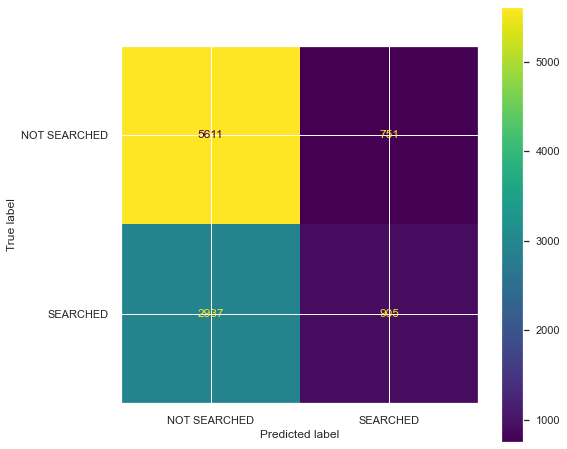

In [68]:
#Refitting the model with best # of neighbors
np.random.seed(1)
knn_frisk = KNeighborsClassifier(n_neighbors=2)
knn_frisk.fit(X5_train, y5_train)
y12_pred = knn_frisk.predict(X5_test)
cm_frisk = confusion_matrix(y5_test,y12_pred)
print(cm_frisk)
print(classification_report(y5_test, y12_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)
display_cm_frisk.plot()



Fitting the model with the best number of neighbors did not significantly increased the accuracy of our model. However, with this optiomal number of neighbors, those who were searched increased their precision score to more than 50%, and reduced scores for both recall and f1-score. Those who were not searched were classified with about the same level of precision, recall and f1-score as the prior model. 

### Using PCA 

              precision    recall  f1-score   support

           0      0.946     0.959     0.952      6362
           1      0.931     0.909     0.920      3842

    accuracy                          0.940     10204
   macro avg      0.938     0.934     0.936     10204
weighted avg      0.940     0.940     0.940     10204



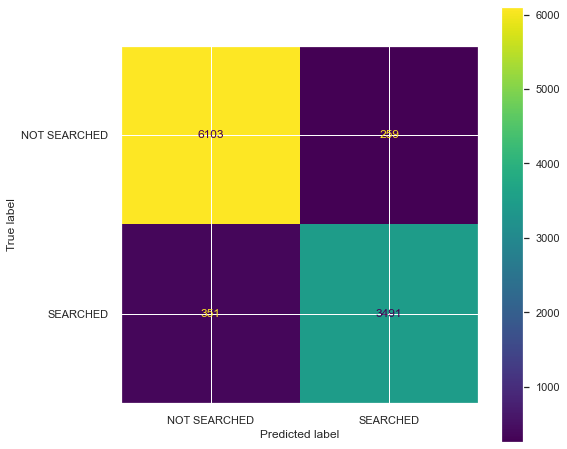

In [69]:
np.random.seed(1)
knn_frisk= KNeighborsClassifier().fit(X6_train, y6_train)
y13_pred = knn_frisk.predict(X6_test)
cm_frisk = confusion_matrix(y6_test,y13_pred)

#print(cm_frisk)
print(classification_report(y6_test, y13_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)

sns.set(rc={"figure.figsize":(8, 8)})
display_cm_frisk.plot()


Using PCA improves KNN model at all levels. The overall accuracy and the precision, recall and f1 scores for both searched and not searched increased above 90%. 

In [70]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#Tunning the model - Finding neighbors using accuracy
k_scores = []
k_range = range(1, 30)#set range from 1 to 30 for initial results
np.random.seed(1)
knn_model = KNeighborsClassifier()
for k in k_range: #looping to print error and k for each iteration
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X6_train, y6_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Accuracy Score: ", scores.mean())
    print("Number of k neighbors: ", k, "\n")


Accuracy Score:  0.9395554618319398
Number of k neighbors:  1 

Accuracy Score:  0.9235514877937735
Number of k neighbors:  2 

Accuracy Score:  0.9423695643734185
Number of k neighbors:  3 

Accuracy Score:  0.9354807492085453
Number of k neighbors:  4 

Accuracy Score:  0.9419915366398554
Number of k neighbors:  5 

Accuracy Score:  0.935354875255436
Number of k neighbors:  6 

Accuracy Score:  0.9390932946046961
Number of k neighbors:  7 

Accuracy Score:  0.9329185357469321
Number of k neighbors:  8 

Accuracy Score:  0.9363631903832512
Number of k neighbors:  9 

Accuracy Score:  0.9323308122072852
Number of k neighbors:  10 

Accuracy Score:  0.9344729811286125
Number of k neighbors:  11 

Accuracy Score:  0.930776613879487
Number of k neighbors:  12 

Accuracy Score:  0.9319527491803106
Number of k neighbors:  13 

Accuracy Score:  0.9292643264781763
Number of k neighbors:  14 

Accuracy Score:  0.9297685458055545
Number of k neighbors:  15 

Accuracy Score:  0.9268702508302773


In [72]:
# depicting the # of neighbors with the highest accuracy score
max_cv= np.max(k_scores)
print("Max accuracy: ", max_cv) 
index = np.argmax(k_scores)
print("Index of max accuracy:", index)
print("Best number of neightbors:", k_range[index])

Max accuracy:  0.9423695643734185
Index of max accuracy: 2
Best number of neightbors: 3


[[6105  257]
 [ 322 3520]]
              precision    recall  f1-score   support

           0      0.950     0.960     0.955      6362
           1      0.932     0.916     0.924      3842

    accuracy                          0.943     10204
   macro avg      0.941     0.938     0.939     10204
weighted avg      0.943     0.943     0.943     10204



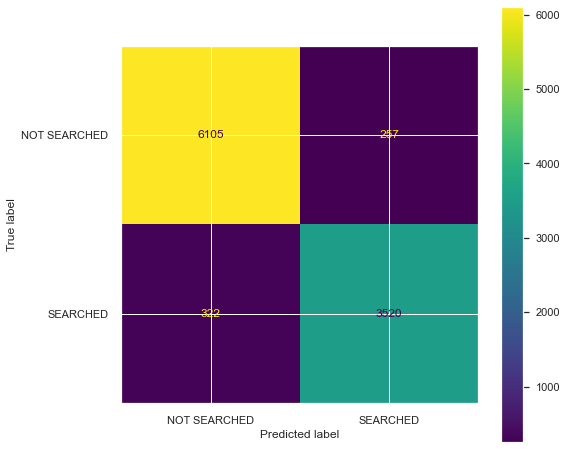

In [73]:
#Refitting the model 
np.random.seed(1)
knn_frisk = KNeighborsClassifier(n_neighbors=3)
knn_frisk.fit(X6_train, y6_train)
y14_pred = knn_frisk.predict(X6_test)
cm_frisk = confusion_matrix(y6_test,y14_pred)
print(cm_frisk)
print(classification_report(y6_test, y14_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk, display_labels=labels)
display_cm_frisk.plot()



By applying PCA, the accuracy, prediction, recall and f1-score of the classes increased signficantly from 60% to above 90%. This was observed both with and without the optional number of neighbors. However, there was not a significant difference in the values before and after the model was tunned with the best number of neightbors.  

## MODEL 2 - Naive Bayes

### Not using PCA

In [74]:
np.random.seed(1)
modelNB = GaussianNB()
CV_error = np.mean(cross_val_score(modelNB, X5, y5, cv=10))
print("Accuracy: ",CV_error)

Accuracy:  0.727501784324941


              precision    recall  f1-score   support

           0      0.723     0.904     0.804      6362
           1      0.729     0.426     0.538      3842

    accuracy                          0.724     10204
   macro avg      0.726     0.665     0.671     10204
weighted avg      0.725     0.724     0.704     10204



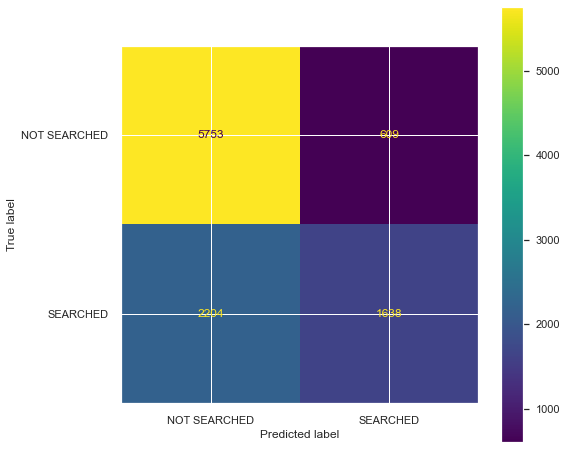

In [75]:
# fitting the data to NB
modelNB.fit(X5_train, y5_train)
y15_pred = modelNB.predict(X5_test)

cm_frisk = confusion_matrix(y5_test,y15_pred)
print(classification_report(y5_test, y15_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk,display_labels=labels)
display_cm_frisk.plot()

Naive Bayes performing better when compared to the KNN with no PCA. In this case, accuracy is at 72%, and is classifying the search and not searched flag with about the same level of precision. However, when compared to KNN with PCA, the model performs worst.  

### Using PCA

In [76]:
np.random.seed(1)
modelNB = GaussianNB()
CV_error = np.mean(cross_val_score(modelNB, X6, y6, cv=10))
print("Accuracy: ",CV_error)

Accuracy:  0.8595451488228122


              precision    recall  f1-score   support

           0      0.853     0.929     0.889      6362
           1      0.862     0.734     0.793      3842

    accuracy                          0.856     10204
   macro avg      0.857     0.832     0.841     10204
weighted avg      0.856     0.856     0.853     10204



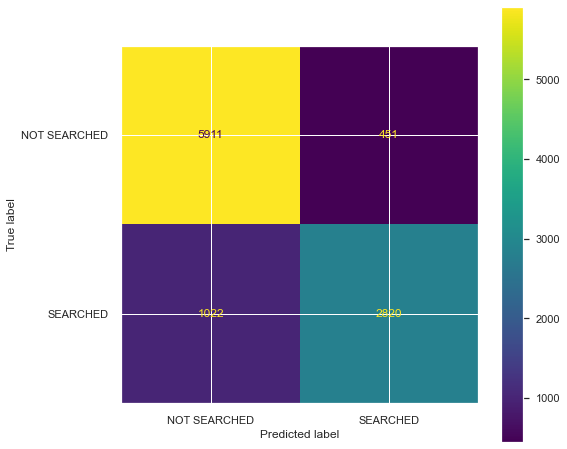

In [77]:
modelNB.fit(X6_train, y6_train)
y16_pred = modelNB.predict(X6_test)

cm_frisk = confusion_matrix(y6_test,y16_pred)
print(classification_report(y6_test, y16_pred, digits=3))

labels=['NOT SEARCHED', 'SEARCHED']

display_cm_frisk = ConfusionMatrixDisplay(confusion_matrix=cm_frisk,display_labels=labels)
display_cm_frisk.plot()



When compared with the Naive Bayes model without PCA, this model performed better. Accuracy scores and precision scores for both the search and not searched classes increased from 72% to values around 85% and 86%. However, when compared with KNN PCA model, this one performed worst decrasing accuarcy and precision scores by about 10%. 

Up to this point, the model with the best performance seems to be KNN with PCA. 

## MODEL 3 - Decision Trees and Random Forests

### Not using PCA 

#### Decision Tree Classifier

In [78]:
np.random.seed(1)
reg_tree = DecisionTreeClassifier()
reg_tree.fit(X5_train, y5_train)
representation = tree.export_text(reg_tree, feature_names= ['ASK_FOR_CONSENT_FLG',
       'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG',
       'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG', 'CONSENT_GIVEN_FLG',
       'DAY', 'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 'FIREARM_FLAG',
       'FRISKED_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'ISSUING_OFFICER_COMMAND_CODE', 'ISSUING_OFFICER_RANK',
       'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION', 'KNIFE_CUTTER_FLAG',
       'LOCATION_IN_OUT_CODE', 'MONTH', 'OBSERVED_DURATION_MINUTES',
       'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_IN_UNIFORM_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_CONTRABAND_FLAG',
       'OTHER_PERSON_STOPPED_FLAG', 'OTHER_WEAPON_FLAG',
       'PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
       'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
       'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG',
       'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
       'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG', 'RECORD_STATUS_CODE',
       'SEARCH_BASIS_ADMISSION_FLAG', 'SEARCH_BASIS_CONSENT_FLAG',
       'SEARCH_BASIS_HARD_OBJECT_FLAG',
       'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 'SEARCH_BASIS_OTHER_FLAG',
       'SEARCH_BASIS_OUTLINE_FLAG', 'SHIELD_IDENTIFIES_OFFICER_FLAG',
       'STOP_DURATION_MINUTES', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME',
       'STOP_ID', 'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_BORO_NAME',
       'STOP_LOCATION_FULL_ADDRESS', 'STOP_LOCATION_PATROL_BORO_NAME',
       'STOP_LOCATION_PRECINCT', 'STOP_LOCATION_SECTOR_CODE',
       'STOP_LOCATION_STREET_NAME', 'STOP_LOCATION_X', 'STOP_LOCATION_Y',
       'STOP_LOCATION_ZIP_CODE', 'STOP_WAS_INITIATED', 'SUMMONS_ISSUED_FLAG',
       'SUMMONS_OFFENSE_DESCRIPTION', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUSPECTED_CRIME_DESCRIPTION',
       'SUSPECTS_ACTIONS_CASING_FLAG',
       'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG',
       'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
       'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG',
       'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG',
       'SUSPECTS_ACTIONS_LOOKOUT_FLAG', 'SUSPECTS_ACTIONS_OTHER_FLAG',
       'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG', 'SUSPECT_ARRESTED_FLAG',
       'SUSPECT_ARREST_OFFENSE', 'SUSPECT_BODY_BUILD_TYPE',
       'SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR', 'SUSPECT_HEIGHT',
       'SUSPECT_OTHER_DESCRIPTION', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_SEX',
       'SUSPECT_WEIGHT', 'VERBAL_IDENTIFIES_OFFICER_FLAG', 'WEAPON_FOUND_FLAG',
       'YEAR','SUSPECT_REPORTED_AGE'])

In [79]:
print(representation)

|--- SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG <= 0.50
|   |--- SEARCH_BASIS_CONSENT_FLAG <= 0.50
|   |   |--- SEARCH_BASIS_HARD_OBJECT_FLAG <= 0.50
|   |   |   |--- SEARCH_BASIS_OTHER_FLAG <= 0.50
|   |   |   |   |--- SEARCH_BASIS_ADMISSION_FLAG <= 0.50
|   |   |   |   |   |--- SEARCH_BASIS_OUTLINE_FLAG <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SEARCH_BASIS_OUTLINE_FLAG >  0.50
|   |   |   |   |   |   |--- SUSPECT_SEX <= 56.00
|   |   |   |   |   |   |   |--- SUSPECT_HAIR_COLOR <= 14.50
|   |   |   |   |   |   |   |   |--- SUSPECT_WEIGHT <= 1.50
|   |   |   |   |   |   |   |   |   |--- STOP_LOCATION_Y <= 183859.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- STOP_LOCATION_Y >  183859.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- SUSPECT_WEIGHT >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- SUSPECT_HAIR_COLOR >  14.50
| 

In [80]:
reg_tree_pred = reg_tree.predict(X5_test)
print(classification_report(y5_test, reg_tree_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.977     0.980     0.978      6362
           1      0.966     0.961     0.964      3842

    accuracy                          0.973     10204
   macro avg      0.971     0.970     0.971     10204
weighted avg      0.973     0.973     0.973     10204



Applying a decision tree classifier increased accuaracy of the classification of the search flag to 97.3% and precision to 97.7% of those who were not searched and 96.6% on those who were searched.  

#### Random Forest Classifier

In [81]:
np.random.seed(1)
rf = RandomForestClassifier()
rf.fit(X5_train, y5_train)

#classification report
print(classification_report(y5_test, rf.predict(X5_test), digits = 3), "\n")

              precision    recall  f1-score   support

           0      0.999     0.974     0.986      6362
           1      0.959     0.998     0.978      3842

    accuracy                          0.983     10204
   macro avg      0.979     0.986     0.982     10204
weighted avg      0.984     0.983     0.983     10204
 



Applying the random forest improves even more the accuracy and precision scores for the variables. Accuracy increased to 98.3% (1% increase from the prior model) and precision for those who were not searched increased to 99.9%. However, the precision for those who were searched decreased to 95.9% which does not seem to be significant. 

In [82]:
np.random.seed(1)
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X5_train, y5_train)

#classification report
print(classification_report(y5_test, rf1.predict(X5_test), digits = 3), "\n")

              precision    recall  f1-score   support

           0      0.999     0.974     0.986      6362
           1      0.959     0.998     0.978      3842

    accuracy                          0.983     10204
   macro avg      0.979     0.986     0.982     10204
weighted avg      0.984     0.983     0.983     10204
 



Specifying the number of estimators as 100 does not have any changes in our model. 

In [83]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#tuning model with CV - runing a loop on increments of 10 to get from 20 to 300 
accuracy = []
n_estimators = [i for i in range(20, 301, 20)]
print("Number of estimators being tested: ", n_estimators, "\n")

for i in n_estimators:
    np.random.seed(1)
    rf2 = RandomForestClassifier(n_estimators=i, random_state=1)
    rf2.fit(X5_train, y5_train)
    rf2_pred = rf2.predict(X5_test)
    cv_scores =  np.mean(cross_val_score(rf2, X5_train, y5_train, cv= 5,scoring='accuracy'))
    accuracy.append(cv_scores)
    print("Number of n_estimators", i)
    print("Mean CV score of %0.8f" % (cv_scores.mean()), "\n")


Number of estimators being tested:  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300] 

Number of n_estimators 20
Mean CV score of 0.97887198 

Number of n_estimators 40
Mean CV score of 0.98105616 

Number of n_estimators 60
Mean CV score of 0.98168615 

Number of n_estimators 80
Mean CV score of 0.98193824 

Number of n_estimators 100
Mean CV score of 0.98252631 

Number of n_estimators 120
Mean CV score of 0.98277833 

Number of n_estimators 140
Mean CV score of 0.98290431 

Number of n_estimators 160
Mean CV score of 0.98298834 

Number of n_estimators 180
Mean CV score of 0.98277828 

Number of n_estimators 200
Mean CV score of 0.98277829 

Number of n_estimators 220
Mean CV score of 0.98282029 

Number of n_estimators 240
Mean CV score of 0.98290430 

Number of n_estimators 260
Mean CV score of 0.98282030 

Number of n_estimators 280
Mean CV score of 0.98286230 

Number of n_estimators 300
Mean CV score of 0.98294630 



In [89]:
max_cv= np.max(accuracy)
print("Max accuracy: ", max_cv) 
index = np.argmax(accuracy)
print("Index of max accuracy:", index)
print("Best number of trees:", n_estimators[index])

Max accuracy:  0.9829883377127668
Index of max accuracy: 7
Best number of trees: 160


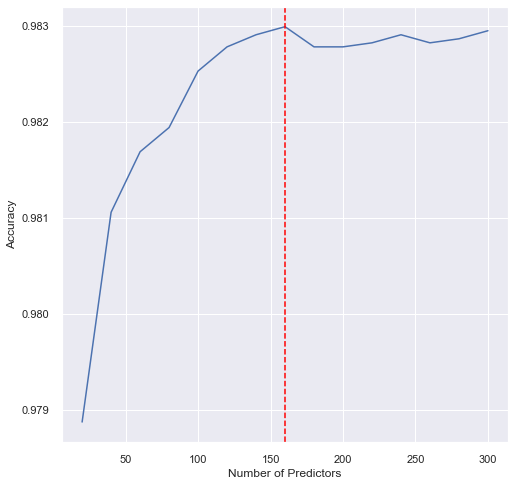

In [85]:
sns.set(rc={"figure.figsize":(8, 8)})
x_graph = list(range(20,301,20))
best_CV = (np.where(accuracy == np.max(accuracy))[0])+1
plt.plot(x_graph, accuracy)
plt.xlabel("Number of Predictors")
plt.ylabel("Accuracy")
plt.axvline(x= n_estimators[index], linestyle='--',color="red")
plt.show()

In [86]:
#Running the model with the best number of estimators 
rf3 = RandomForestClassifier(n_estimators = 160, random_state=1)
rf3.fit(X5_train, y5_train)

#CLASSIFICATION REPORTs

print(classification_report(y5_test, rf3.predict(X5_test), digits = 3))

              precision    recall  f1-score   support

           0      0.999     0.975     0.987      6362
           1      0.959     0.999     0.979      3842

    accuracy                          0.984     10204
   macro avg      0.979     0.987     0.983     10204
weighted avg      0.984     0.984     0.984     10204



In this instance, adding the best number of estimators to the model does not significantly improve the accuracy of the model as it increased from 98.3% to 98.4%. Additionally, no changes were observed in the precision of the model. However, among all of the models we have run up to this point, this one is providing the best results in terms of accuracy and precision to classify our model.

In [20]:
#Random Forest - Grid Search CV - Finding the best parameters

from sklearn.model_selection import GridSearchCV              
paramgrid = { 
    'n_estimators': [i for i in range(20,301,200)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(10, 100, 10)]}

In [21]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
np.random.seed(1)
rf4 = RandomForestClassifier()
model = GridSearchCV(rf4, param_grid = paramgrid)
model.fit(X5_train, y5_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 220]})

In [22]:
#selecting best parameters
model.best_params_ 

{'max_depth': 90, 'max_features': 'sqrt', 'n_estimators': 220}

In [91]:
#Refitting model with best parameters
np.random.seed(1)
rf5 = RandomForestClassifier(n_estimators= 220 , max_features= 'sqrt', max_depth= 90, random_state=1)
rf5.fit(X5_train, y5_train)

#Classification Reports
print(classification_report(y5_test, rf5.predict(X5_test), digits = 3))

              precision    recall  f1-score   support

           0      0.999     0.974     0.987      6362
           1      0.959     0.999     0.978      3842

    accuracy                          0.983     10204
   macro avg      0.979     0.986     0.983     10204
weighted avg      0.984     0.983     0.984     10204



In this instance, using the grid search to obtain the best parameters and fit them into a random forest classifier does not change the accuracy or the precision of our model when compared to the random forest classifer model with 100 estimators. 

<AxesSubplot:xlabel='importance', ylabel='feature'>

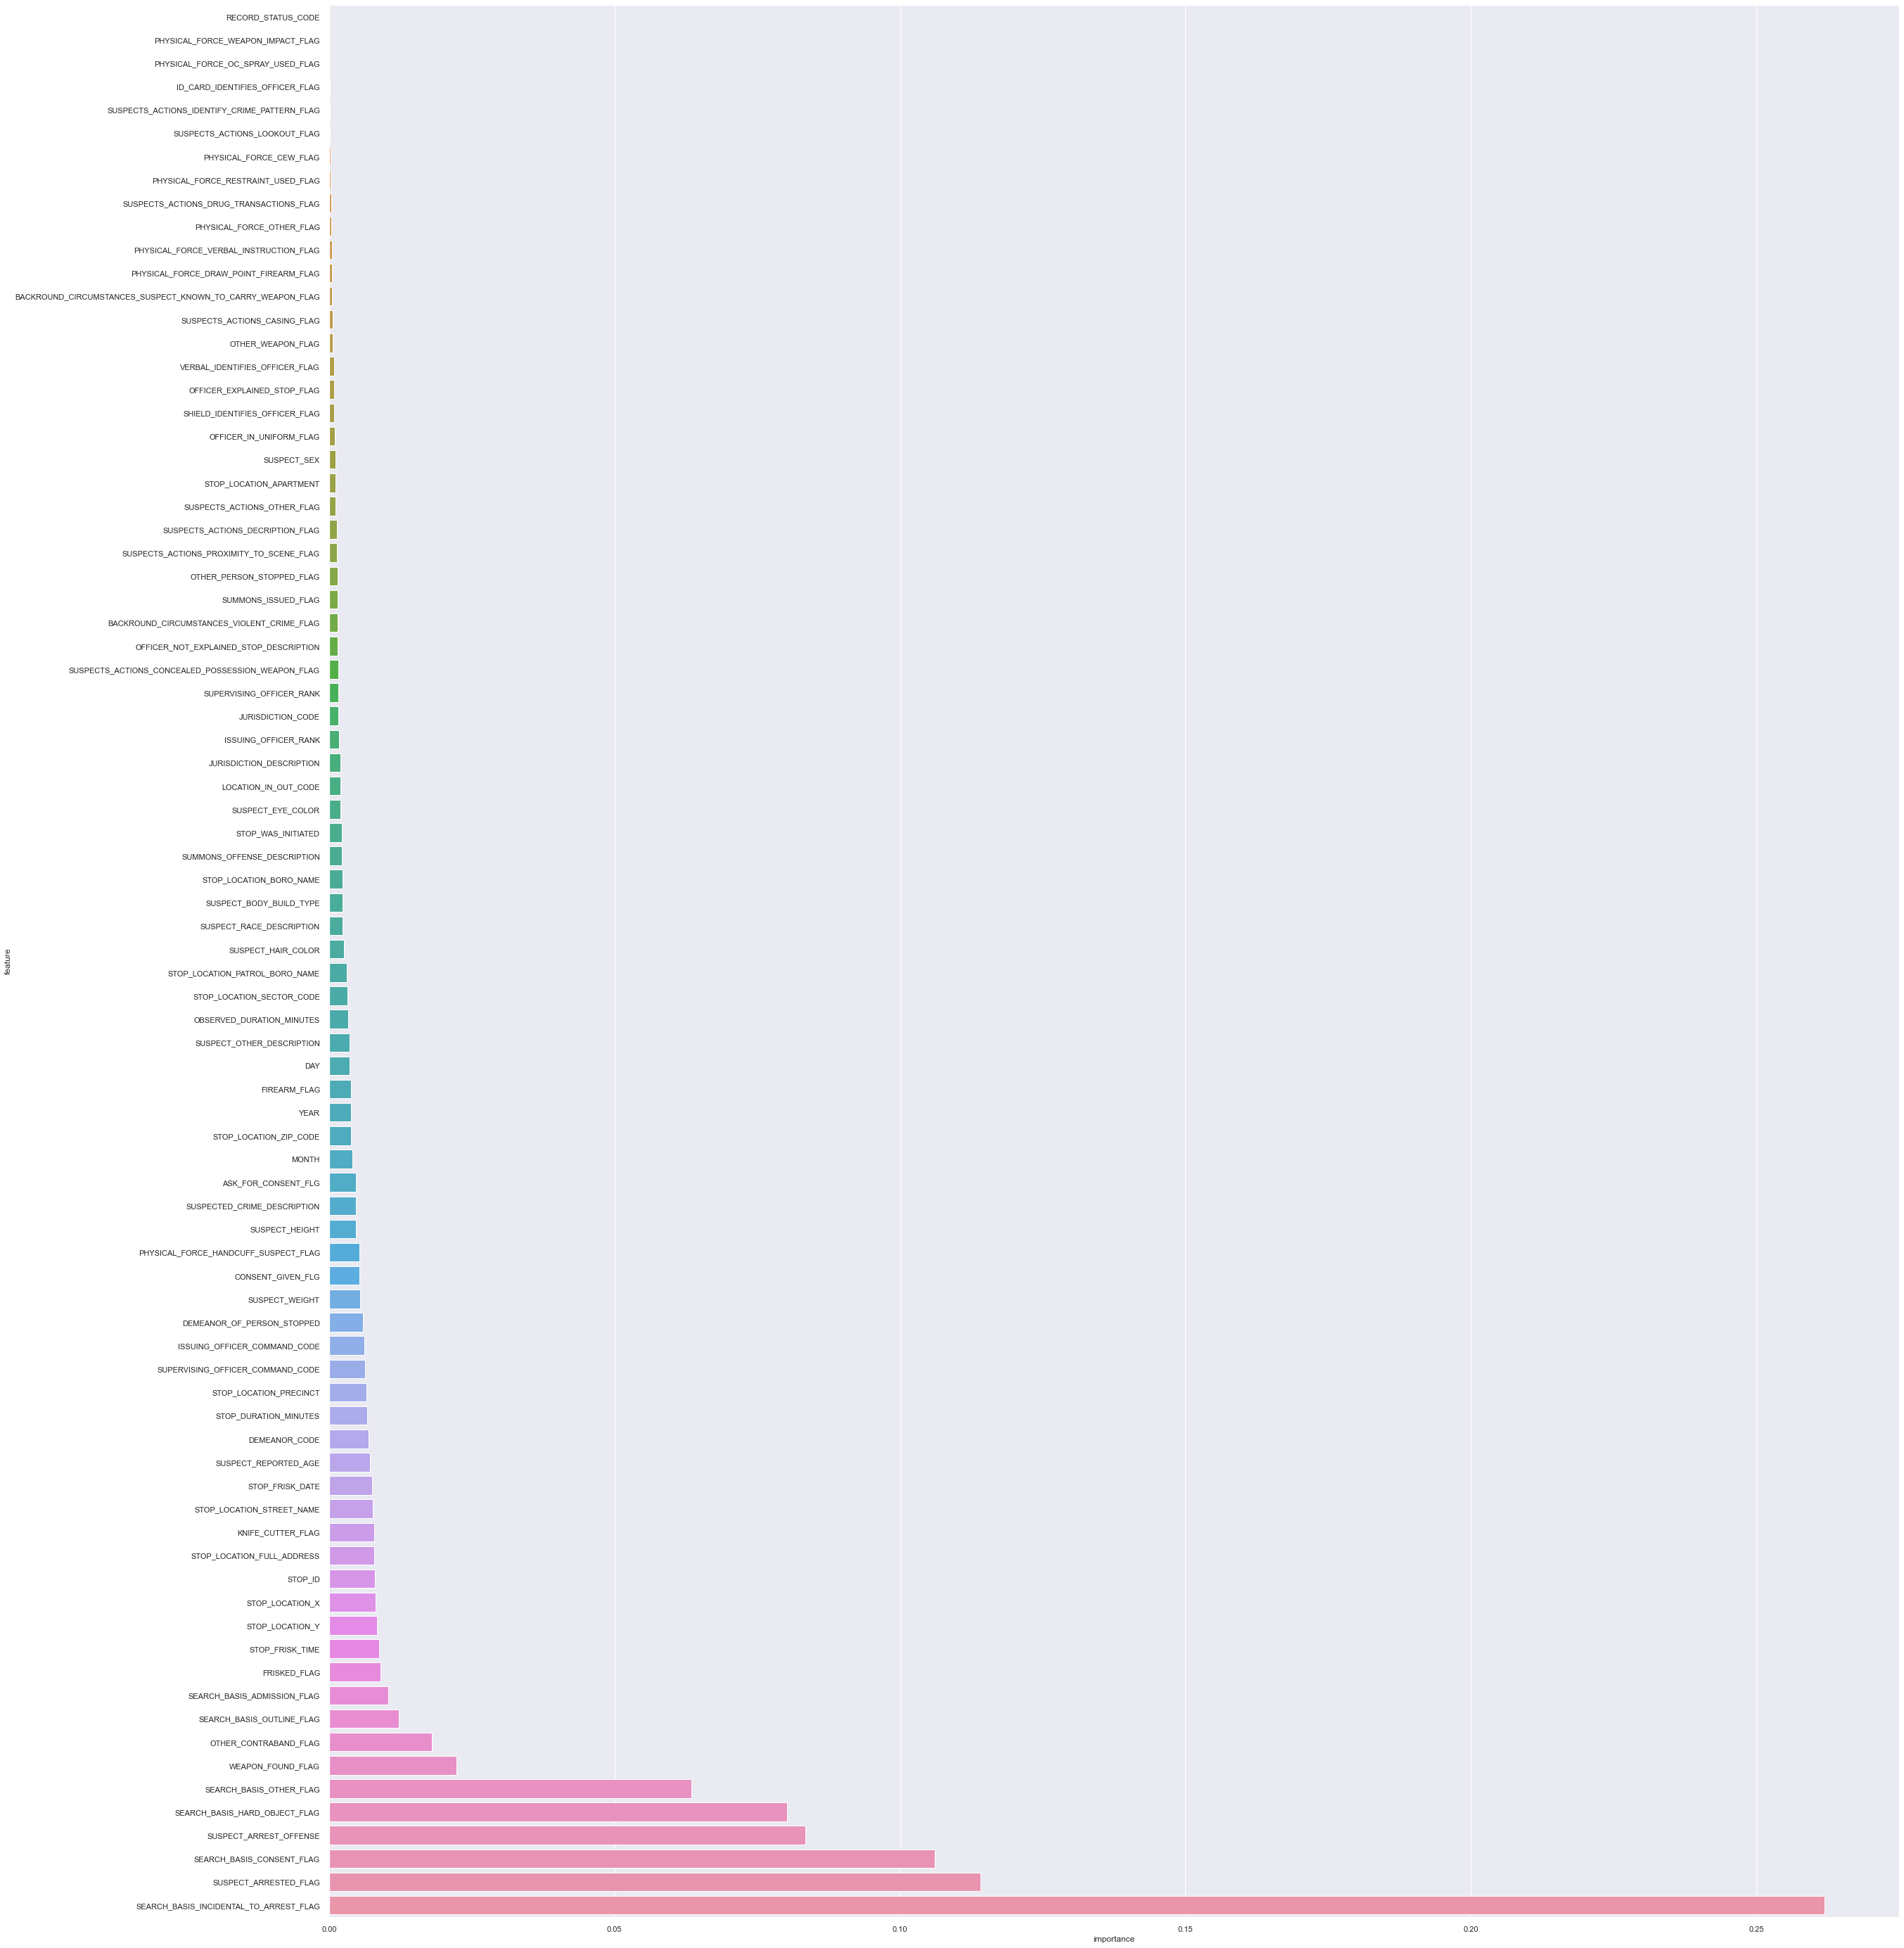

In [92]:
#finding the most important variables for our model 

f = pd.Series(rf5.feature_importances_, name= 'importance')
c = pd.Series(X5_train.columns.tolist(), name = 'feature')
data_frame = pd.concat([f, c], axis = 1)
data_frame.sort_values(inplace = True, by = 'importance')
sns.set(rc={"figure.figsize":(40, 50)})
sns.barplot(data = data_frame, x = 'importance', y= 'feature')


The Top 4 most relevant features to classify the searched flag are: SEARCH_BASIS_INCIDDENTAL_TO_ARREST_FLAG, SUSPECT_ARRESTED_FLAG, SEARCH_BASIS_CONSENT_FLAG and SUSPECT_ARREST_FLAG indicating individual's criminal record seems to be playing an important role on whether the individual was searched. 

Additionally, SUSPECT_SEX, SUSPECT_RACE, SUSPECT_AGE and other features controlling for physical appearance such as height, weight, hair color, etc had low importance into the classification of our searched flag. This indicates that between 2018 and 2020, police officers does not seem to have been discriminating based on gender, race, age and physical appearance. 

### Using PCA

#### Decision Tree Classifier

In [93]:
np.random.seed(1)
reg_tree2 = DecisionTreeClassifier()
reg_tree2.fit(X6_train, y6_train)
representation = tree.export_text(reg_tree2, feature_names= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [94]:
print(representation)

|--- PC1 <= 0.39
|   |--- PC3 <= 2.11
|   |   |--- PC1 <= -0.94
|   |   |   |--- PC3 <= 0.60
|   |   |   |   |--- PC1 <= -1.11
|   |   |   |   |   |--- PC3 <= 0.34
|   |   |   |   |   |   |--- PC5 <= -1.96
|   |   |   |   |   |   |   |--- PC5 <= -1.96
|   |   |   |   |   |   |   |   |--- PC1 <= -1.18
|   |   |   |   |   |   |   |   |   |--- PC10 <= 1.97
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- PC10 >  1.97
|   |   |   |   |   |   |   |   |   |   |--- PC10 <= 1.98
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- PC10 >  1.98
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- PC1 >  -1.18
|   |   |   |   |   |   |   |   |   |--- PC2 <= -0.89
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- PC2 >  -0.89
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PC5 >

In [95]:
reg_tree_pred2 = reg_tree2.predict(X6_test)
print(classification_report(y6_test, reg_tree_pred2, digits = 3))

              precision    recall  f1-score   support

           0      0.938     0.942     0.940      6362
           1      0.903     0.897     0.900      3842

    accuracy                          0.925     10204
   macro avg      0.920     0.919     0.920     10204
weighted avg      0.925     0.925     0.925     10204



While this model provides excelent results as all values for accuracy, precision, recall and f1 score are at or above 90%,  the decision tree classifier model without PCA provided higher results. 

#### Random Forest Classifier

In [96]:
np.random.seed(1)
rf = RandomForestClassifier()
rf.fit(X6_train, y6_train)

#classification report
print(classification_report(y6_test, rf.predict(X6_test), digits = 3), "\n")

              precision    recall  f1-score   support

           0      0.969     0.953     0.961      6362
           1      0.924     0.949     0.936      3842

    accuracy                          0.951     10204
   macro avg      0.946     0.951     0.948     10204
weighted avg      0.952     0.951     0.952     10204
 



When compared to the decision classifier using PCA, the random forest seems to be performing betten than the decision classifier model as overall accuracy and precision, recall and f1-score are providing higher scores at every metric. However, when compared to the Random Forest model without PCA, the model is doing worst. 

In [97]:
np.random.seed(1)
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X6_train, y6_train)

#classification report
print(classification_report(y6_test, rf1.predict(X6_test), digits = 3), "\n")

              precision    recall  f1-score   support

           0      0.969     0.953     0.961      6362
           1      0.924     0.949     0.936      3842

    accuracy                          0.951     10204
   macro avg      0.946     0.951     0.948     10204
weighted avg      0.952     0.951     0.952     10204
 



Defining the number of trees as 100 does not impact the results on the classification report.

In [98]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
#tuning model with CV - runing a loop on increments of 10 to get from 20 to 300 
accuracy = []
n_estimators = [i for i in range(20, 301, 20)]
print("Number of estimators being tested: ", n_estimators, "\n")

for i in n_estimators:
    np.random.seed(1)
    rf2 = RandomForestClassifier(n_estimators=i, random_state=1)
    rf2.fit(X6_train, y6_train)
    rf2_pred = rf2.predict(X6_test)
    cv_scores =  np.mean(cross_val_score(rf2, X6_train, y6_train, cv= 5,scoring='accuracy'))
    accuracy.append(cv_scores)
    print("Number of n_estimators", i)
    print("Mean CV score of %0.8f" % (cv_scores.mean()), "\n")

Number of estimators being tested:  [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300] 

Number of n_estimators 20
Mean CV score of 0.94526813 

Number of n_estimators 40
Mean CV score of 0.94812443 

Number of n_estimators 60
Mean CV score of 0.94799837 

Number of n_estimators 80
Mean CV score of 0.94888054 

Number of n_estimators 100
Mean CV score of 0.94841847 

Number of n_estimators 120
Mean CV score of 0.94875455 

Number of n_estimators 140
Mean CV score of 0.94896462 

Number of n_estimators 160
Mean CV score of 0.94871258 

Number of n_estimators 180
Mean CV score of 0.94934257 

Number of n_estimators 200
Mean CV score of 0.94904858 

Number of n_estimators 220
Mean CV score of 0.94951060 

Number of n_estimators 240
Mean CV score of 0.94946856 

Number of n_estimators 260
Mean CV score of 0.94930056 

Number of n_estimators 280
Mean CV score of 0.94938455 

Number of n_estimators 300
Mean CV score of 0.94972057 



In [100]:
max_cv= np.max(accuracy)
print("Max accuracy: ", max_cv) 
index = np.argmax(accuracy)
print("Index of max accuracy:", index)
print("Best number of trees:", n_estimators[index])

Max accuracy:  0.9497205657651182
Index of max accuracy: 14
Best number of trees: 300


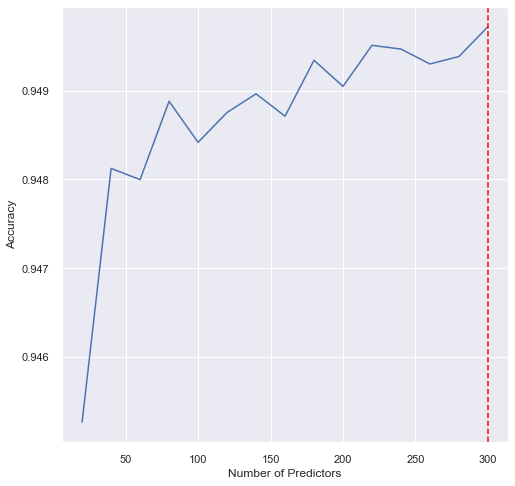

In [101]:
sns.set(rc={"figure.figsize":(8, 8)})
x_graph = list(range(20,301,20))
best_CV = (np.where(accuracy == np.max(accuracy))[0])+1
plt.plot(x_graph, accuracy)
plt.xlabel("Number of Predictors")
plt.ylabel("Accuracy")
plt.axvline(x= n_estimators[index], linestyle='--',color="red")
plt.show()

In [102]:
#Running the model with the best number of estimators 
np.random.seed(1)
rf3 = RandomForestClassifier(n_estimators = 300, random_state=1)
rf3.fit(X6_train, y6_train)

#CLASSIFICATION REPORTs

print(classification_report(y6_test, rf3.predict(X6_test), digits = 3))

              precision    recall  f1-score   support

           0      0.970     0.953     0.961      6362
           1      0.925     0.951     0.937      3842

    accuracy                          0.952     10204
   macro avg      0.947     0.952     0.949     10204
weighted avg      0.953     0.952     0.952     10204



Fitting the model on the best number of trees in this case does not significantly improve the performance of the model. While based on performance the accuracy, precision, recall and f1 score are in above 90%, when compared to the random forest model with the best number of predictors wihtout PCA, this model did slightly worst. 

In [23]:
#Random Forest - Grid Search CV - Finding the best parameters

from sklearn.model_selection import GridSearchCV              
paramgrid = { 
    'n_estimators': [i for i in range(20,301,200)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(10, 100, 10)]}

In [24]:
#PLEASE NOTE THIS SECTION WILL TAKE A LONG TIME TO RUN
np.random.seed(1)
rf4 = RandomForestClassifier()
model = GridSearchCV(rf4, param_grid = paramgrid)
model.fit(X6_train, y6_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 220]})

In [25]:
#selecting best parameters
model.best_params_ 

{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 220}

In [27]:
#Refitting model with best parameters
np.random.seed(1)
rf5 = RandomForestClassifier(n_estimators= 220 , max_features= 'sqrt', max_depth= 40, random_state=1)
rf5.fit(X6_train, y6_train)

#Classification Reports
print(classification_report(y6_test, rf5.predict(X6_test), digits = 3))

              precision    recall  f1-score   support

           0      0.971     0.953     0.962      6362
           1      0.925     0.952     0.938      3842

    accuracy                          0.953     10204
   macro avg      0.948     0.953     0.950     10204
weighted avg      0.953     0.953     0.953     10204



Among the decision trees with PCA, this model provides the best results with an accuracy score of 95.3%, precisions scores at 92.5% for those who were searched and of 97.1% of those who were not. The recall and f1-score are both above 90% which seems to be a great 

When compared to the random forest classfier with the best number of predictors without PCA, this model performs slightly worst with lower rates for accuracy, and prediction, recall and f1-scores for both who were searched and not searched.  

When looking at all of the models performed to classify the search flag using KNN, Naive Bayes and Decision Trees/Random Forests, the one that performs the best considering all the classification report metrics is the Random Forest eith the best number of trees (160) without PCA.  

### Conclusions

#### Overall Conclusions 

**1: Classifiying Stop Duration Minutes**

While the logisitc regression model does give a better performance than the Naive Bayes model, our best classification model for the Stop Duration Minutes is the KNN Model(with oversampling).

The results have been displayed below for conveient review for the best results obtained for each model type:

i. ***KNN Model(with oversampling):***
              
              precision    recall  f1-score   support

    0-30 Min      1.000     0.891     0.942      9869
    31-60 Min     0.917     1.000     0.957      9683
     60+ Min      0.980     1.000     0.990      9743

    accuracy                          0.963      29295
    macro avg      0.966     0.964    0.963      29295
    weighted avg   0.966     0.963    0.963      29295

ii. *Naive Bayes model (with oversampling):*

              precision    recall  f1-score   support

    0-30 Min      0.460     0.199     0.277      9869
    31-60 Min     0.370     0.845     0.514      9683
     60+ Min      0.760     0.226     0.349      9743

    accuracy                          0.421     29295
    macro avg     0.530     0.423     0.380     29295
    weighted avg  0.530     0.421     0.379     29295



iii. *Logistic Regression model (with oversampling)*

              precision    recall  f1-score   support

    0-30 Min      0.417     0.465     0.440      9869
    31-60 Min     0.400     0.409     0.404      9683
     60+ Min      0.516     0.443     0.477      9743

    accuracy                          0.439     29295
    macro avg     0.444     0.439     0.440     29295
    weighted avg  0.444     0.439     0.440     29295



**2: Classifying Frisk Occurence**

After running the KNN, NB, and Logistic Regression models, we can conclude that the Logistic Regression model with PCA and the KNN model with PCA and CV selection for accuracy score did the best job classifying our data.Below we are including also the matrixes for the best models run for each KNN, NB and Logistic Regression. 

The results have been displayed below for conveient review for the best results obtained for each model type:

i. ***KNN Model with PCA:***

              precision    recall  f1-score   support

           0      0.666     0.705     0.685      4389
           1      0.767     0.734     0.750      5815

    accuracy                          0.721     10204
    macro avg     0.717     0.719     0.718     10204
    weighted avg  0.724     0.721     0.722     10204
 
ii. *Naive Bayes Model with PCA:* 

              precision    recall  f1-score   support

           0      0.574     0.739     0.646      4389
           1      0.749     0.586     0.657      5815

    accuracy                          0.652     10204
    macro avg     0.661     0.663     0.652     10204
    weighted avg  0.674     0.652     0.653     10204

iii. ***Logistic Regression with PCA:*** 

              precision    recall  f1-score   support

           0      0.668     0.647     0.657      4389
           1      0.740     0.758     0.749      5815

    accuracy                          0.710     10204
    macro avg     0.704     0.702     0.703     10204
    weighted avg  0.709     0.710     0.709     10204


   

**3: Classifying Search Occurence**

After running the KNN, NB, and Decision Trees/Random Forest models, we can conclude that the Random Forest Model with no PCA tunned using the best number of trees as 160 did the best in classying our data. 

The results have been displayed below for conveient review for the best results obtained for each model type:

i. *KNN Model with PCA with best number of predictors (3)*

              precision    recall  f1-score   support

           0      0.950     0.960     0.955      6362
           1      0.932     0.916     0.924      3842

    accuracy                          0.943     10204
    macro avg     0.941     0.938     0.939     10204
    weighted avg  0.943     0.943     0.943     10204
   

ii. *Naive Bayes Model with PCA:* 

              precision    recall  f1-score   support

           0      0.853     0.929     0.889      6362
           1      0.862     0.734     0.793      3842

    accuracy                          0.856     10204
    macro avg     0.857     0.832     0.841     10204
    weighted avg  0.856     0.856     0.853     10204


iii. *** Random Forest with best number of estimators (160):*** 

      precision    recall  f1-score   support

           0      0.999     0.975     0.987      6362
           1      0.959     0.999     0.979      3842

    accuracy                          0.984     10204
    macro avg     0.979     0.987     0.983     10204
    weighted avg  0.984     0.984     0.984     10204



#### Objective Conclusions 

1. We can predict that an individual who is stopped would fall into one of the 3 classes of stop duration times with an accuracy of 96.3% with an average precision of 96.6% (using a KNN classifier)

2. We can classify whether an individual who is stopped would also be frisked up to an accuracy of 72.1% with an average precision of 71.7% (Using a KNN classifier). We can also use a Logistic Regression model with an accuracy of up to 71% and an average precision of 70.4%.

3. We can classify whether an individual who is stopped would also be searched with an accuracy of up to 98.4% with an average precision of 99% for those who were not searched, and with a 95.9 to those who were searched. For the classification on the search flag, the most important features were SEARCH_BASIS_INCIDDENTAL_TO_ARREST_FLAG, SUSPECT_ARRESTED_FLAG, SEARCH_BASIS_CONSENT_FLAG and SUSPECT_ARREST_FLAG, while SUSPECT_SEX, SUSPECT_RACE and SUSPECT_AGE were among the less importants. This seems to indicate that when searching an individual, the police is not discriminating agaisnt or targetting a particular minority, gender, or age group. 

### Future Work

**Direct Next Steps - Expanding the scope of our analysis from classification to prediction where:


1. We can predict the factors involved in an individual getting stopped for a specific duration of time, and whether there are certain indicators which would skew the possibility of an individual being stopped for a longer period.


2. We are able to extract the factors involved in an individual who is stopped and frisked, and predict the probability that a person with similar characteristics would be exposed to the same situation in the future


3. We can predict the probability that an individual with a specific set of characteristics would be stopped and searched


4. We can increase the size of our superset and track the data all the way back to 2003, increasing the number of datapoints, and thus being able to train our models better



**Future Scope 

1. Identifying specific locations or regions which are susceptible to a greater number of people being stopped and frisked, and checking its correlation to the relevant geographical, social and economic factors. 


2. Predicting the probability of future arrests in a particular location, based on crime statistics


3. Extending research into sentiment analysis to develop a relationship between social media trends of hate speech and racial profiling with rising police brutality cases 


4. Developing an automated system to cross verify the validity of a stop and search based on specific features. This could be used to eliminate human bias, and eliminate the chance of racial profiling.


**References**

- Used prior homework and labs as reference
- https://stackoverflow.com/questions/36226083/
- https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
- https://www.statology.org/principal-components-regression-in-python/
- https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
- http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?-highlight=linear%20regression#sklearn.linear_model.LinearRegression
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/naive_bayes.html
- https://www.washingtonpost.com/news/wonk/wp/2013/08/13/heres-what-you-need-to-know-about-stop-and-frisk-and-why-the-courts-shut-it-down/.
- https://www.nyclu.org/en/stop-and-frisk-data. 
- https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page
- https://www.icpsr.umich.edu/web/NACJD/studies/21660/summary.
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
- https://www.geeksforgeeks.org/how-to-randomly-select-rows-of-an-array-in-python-with-numpy/
- https://www.scikit-yb.org/en/latest/quickstart.html 
- https://www.scikit-yb.org/en/latest/api/features/rankd.html 
- https://www.scikit-yb.org/en/latest/api/features/index.html 
- https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://select-statistics.co.uk/blog/market-basket-analysis-understanding-customer-behaviour/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
- https://imbalanced-learn.org/stable/ 